# Recommendation System for LearnLink: A Language Learning Platform for Children aged 11-22 with Disabilities
- [Winner, "Most Polished" Award, Flatiron School "Hacktember" Hackathon](https://www.linkedin.com/posts/the-flatiron-school_hacktember-2023-activity-7118317692645691392-anbR)

#### Author: Lillian Lakes
- [GitHub Profile](https://github.com/lillianlakes) 
- [LinkedIn Profile](https://www.linkedin.com/in/lillianlakes/) 

## Preliminary Steps

In [1]:
# Import required libraries

# Data creation, processing and computation
import pandas as pd
import numpy as np
import random
from faker import Faker
from scipy import stats
import datetime as dt

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# Modeling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.dummy import DummyRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.inspection import permutation_importance
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Exporting functions and variables
import dill

## Create the Synthetic Users and Settings Data

In [2]:
# Set random seeds for reproducibility
random.seed(0)
np.random.seed(0)

# Create a Faker instance for generating fake data
fake = Faker()
fake.seed_instance(0)

# Define languages list
# Languages are based on English (for English as a Second Language Students)
# and the top seven foreign languages taught as part of K-12 education
languages = ['Spanish', 'French', 'German', 'Latin', 'Japanese', 'Chinese', 'Russian', 'English']

# Define test score range
score_min, score_max = 0, 100

# Define WCAG-based accessibility settings for different disability types, with appropriate average 
# test scores and score standard deviations
disability_settings = [
    # Accessibility settings for disability_id 90000001
     {
      'disability_id': 90000001,
      'accessibility_types': [
          # WCAG-based accessibility settings with high score averages and low standard deviations
         {
          'setting_type': '90000001A',
          'font_color' : 'charcoal',
          'background_color' : 'pastel light blue',
          'font_size' : 15,
          'font_weight' : 'regular',
          'font_family' : 'Trebuchet',
          'letter_spacing' : 5.25,	
          'line_spacing' : 22.5,
          'word_spacing' : 78.75,
          'text_alignment' : 'left aligned',	
          'is_auto_play_tts' : False,
          'bionic_reading' : False,
          'lists_with_bullets': False,
          'wcag_compliant': True,
          'score_avg': 85,
          'score_std': 15
         },
         {
          'setting_type': '90000001B',
          'font_color' : 'licorice',
          'background_color' : 'pastel light yellow',
          'font_size' : 14,
          'font_weight' : 'regular',
          'font_family' : 'Tahoma',
          'letter_spacing' : 4.9,	
          'line_spacing' : 21,
          'word_spacing' : 73.5,
          'text_alignment' : 'left aligned',	
          'is_auto_play_tts' : False,
          'bionic_reading' : False,
          'lists_with_bullets': False,
          'wcag_compliant': True,
          'score_avg': 80,
          'score_std': 20
         },
         {
          'setting_type': '90000001C',
          'font_color' : 'onyx',
          'background_color' : 'light cream',
          'font_size' : 12,
          'font_weight' : 'regular',
          'font_family' : 'Century Gothic',
          'letter_spacing' : 4.2,	
          'line_spacing' : 18,
          'word_spacing' : 63,
          'text_alignment' : 'left aligned',	
          'is_auto_play_tts' : False,
          'bionic_reading' : False,
          'lists_with_bullets': False,
          'wcag_compliant': True,
          'score_avg': 95,
          'score_std': 15
         },
         {
          'setting_type': '90000001D',
          'font_color' : 'matte black',
          'background_color' : 'light gray',
          'font_size' : 13,
          'font_weight' : 'regular',
          'font_family' : 'Open Sans',
          'letter_spacing' : 4.55,	
          'line_spacing' : 19.5,
          'word_spacing' : 68.25,
          'text_alignment' : 'left aligned',	
          'is_auto_play_tts' : False,
          'bionic_reading' : False,
          'lists_with_bullets': False,
          'wcag_compliant': True,
          'score_avg': 95,
          'score_std': 15
         },
         # Non-WCAG-based accessibility setting with a low score average and higher standard deviation
         {
          'setting_type': '90000001E',
          'font_color' : 'white',
          'background_color' : 'red',
          'font_size' : 8,
          'font_weight' : 'regular',
          'font_family' : 'Open Sans',
          'letter_spacing' : 2.55,	
          'line_spacing' : 7.5,
          'word_spacing' : 30.25,
          'text_alignment' : 'left aligned',	
          'is_auto_play_tts' : False,
          'bionic_reading' : False,
          'lists_with_bullets': False,
          'wcag_compliant': False,
          'score_avg': 55,
          'score_std': 45
         }
      ]
   },
   # Accessibility settings for disability_id 90000002
    {
      'disability_id': 90000002,
      'accessibility_types': [
          # WCAG-based accessibility settings with high score averages and low standard deviations
         {
          'setting_type': '90000002A',
          'font_color' : 'dark gray',
          'background_color' : 'eggshell',
          'font_size' : 16,
          'font_weight' : 'regular',
          'font_family' : 'Open Sans',
          'letter_spacing' : 1.92,	
          'line_spacing' : 28,
          'word_spacing' : 2.56,
          'text_alignment' : 'left aligned',	
          'is_auto_play_tts' : False,
          'bionic_reading' : True,
          'lists_with_bullets': True,
          'wcag_compliant': True,
          'score_avg': 95,
          'score_std': 15
         },
         {
          'setting_type': '90000002B',
          'font_color' : 'midnight blue',
          'background_color' : 'ivory',
          'font_size' : 12,
          'font_weight' : 'regular',
          'font_family' : 'Lexend',
          'letter_spacing' : 1.44,	
          'line_spacing' : 21,
          'word_spacing' : 1.92,
          'text_alignment' : 'left aligned',	
          'is_auto_play_tts' : False,
          'bionic_reading' : True,
          'lists_with_bullets': True,
          'wcag_compliant': True,
          'score_avg': 95,
          'score_std': 15
         },
         {
          'setting_type': '90000002C',
          'font_color' : 'charcoal',
          'background_color' : 'light gray',
          'font_size' : 14,
          'font_weight' : 'regular',
          'font_family' : 'Helvetica',
          'letter_spacing' : 1.68,	
          'line_spacing' : 24.5,
          'word_spacing' : 2.24,
          'text_alignment' : 'left aligned',	
          'is_auto_play_tts' : False,
          'bionic_reading' : True,
          'lists_with_bullets': True,
          'wcag_compliant': True,
          'score_avg': 90,
          'score_std': 15
         },
         # Non-WCAG-based accessibility setting with a low score average and higher standard deviation
         {
          'setting_type': '90000002D',
          'font_color' : 'yellow',
          'background_color' : 'orange',
          'font_size' : 9,
          'font_weight' : 'regular',
          'font_family' : 'Helvetica',
          'letter_spacing' : 1.18,	
          'line_spacing' : 12.5,
          'word_spacing' : 1.24,
          'text_alignment' : 'left aligned',	
          'is_auto_play_tts' : False,
          'bionic_reading' : False,
          'lists_with_bullets': False,
          'wcag_compliant': False,
          'score_avg': 50,
          'score_std': 55
         }
      ]
   },
   # Accessibility settings for disability_id 90000003
    {
      'disability_id': 90000003,
      'accessibility_types': [
          # WCAG-based accessibility settings with high score averages and low standard deviations
         {
          'setting_type': '90000003A',
          'font_color' : 'nightrider',
          'background_color' : 'quartz',
          'font_size' : 15,
          'font_weight' : 'bold',
          'font_family' : 'Poppins',
          'letter_spacing' : 1.8,	
          'line_spacing' : 22.5,
          'word_spacing' : 2.4,
          'text_alignment' : 'left aligned',
          'is_auto_play_tts' : False,
          'bionic_reading' : False,
          'lists_with_bullets': False,
          'wcag_compliant': True,
          'score_avg': 95,
          'score_std': 20
         },
         {
          'setting_type': '90000003B',
          'font_color' : 'black russian',
          'background_color' : 'prim',
          'font_size' : 18,
          'font_weight' : 'regular',
          'font_family' : 'Source Sans Pro',
          'letter_spacing' : 2.16,	
          'line_spacing' : 27,
          'word_spacing' : 2.88,
          'text_alignment' : 'left aligned',
          'is_auto_play_tts' : False,
          'bionic_reading' : False,
          'lists_with_bullets': False,
          'wcag_compliant': True,
          'score_avg': 90,
          'score_std': 15
         },
         {
          'setting_type': '90000003C',
          'font_color' : 'charcoal',
          'background_color' : 'linen',
          'font_size' : 24,
          'font_weight' : 'regular',
          'font_family' : 'Century Gothic',
          'letter_spacing' : 2.88,	
          'line_spacing' : 36,
          'word_spacing' : 3.84,
          'text_alignment' : 'left aligned',
          'is_auto_play_tts' : False,
          'bionic_reading' : False,
          'lists_with_bullets': False,
          'wcag_compliant': True,
          'score_avg': 85,
          'score_std': 20
         },
         # Non-WCAG-based accessibility setting with a low score average and higher standard deviation
         {
          'setting_type': '90000003D',
          'font_color' : 'green',
          'background_color' : 'yellow',
          'font_size' : 10,
          'font_weight' : 'regular',
          'font_family' : 'Century Gothic',
          'letter_spacing' : 1.88,	
          'line_spacing' : 15,
          'word_spacing' : 1.84,
          'text_alignment' : 'left aligned',
          'is_auto_play_tts' : False,
          'bionic_reading' : False,
          'lists_with_bullets': False,
          'wcag_compliant': False,
          'score_avg': 55,
          'score_std': 45
         }
      ]
   },
]

# Create array of disability IDs
disability_ids = [setting['disability_id'] for setting in disability_settings]

# Load the profile images from 'data/child_images.csv'
profile_photos = pd.read_csv('data/Child_Images.csv')
photo_index = 0


# Function to generate the next available profile photo from profile_photos
def get_next_profile_photo():
    """
    Get the next profile photo URL from 'data/child_images.csv' sequentially.

    Returns:
    - str: URL for the profile photo
    """
    global photo_index

    # Reset index if all photos are exhausted
    if photo_index >= len(profile_photos):
        photo_index = 0

    # Get the next profile photo URL
    photo_url = profile_photos.loc[photo_index, 'image_url']

    # Increment index for the next call
    photo_index += 1

    return photo_url


# Function to generate user data
def generate_user_data(x):
    """
    Generate user data based on the specified number (x) of users.

    Parameters:
    - x (int): Number of users to generate

    Returns:
    - DataFrame: Dataframe containing user data
    """

    users_data = [
        {
            'id': 10000001 + i,
            'first_name': fake.first_name(),
            'last_name': (last_name := fake.last_name()),
            'username': f"{fake.first_name().lower()}.{last_name.lower()}@{fake.domain_name()}",
            'date_of_birth': fake.date_of_birth(None, 11, 22),
            'native_language': languages[i % (len(languages) + 6)] if i % (len(languages) + 6) >= 0 and 
              i % (len(languages) + 6) < (len(languages) - 1) else languages[-1],
            'learning_language': languages[-1] if i % (len(languages) + 6) >= 0 and i % (len(languages) + 6) 
              < (len(languages) - 1) else languages[i % (len(languages) + 6) - (len(languages) - 1)],
            'disability_id': disability_ids[i % len(disability_ids)],
            'created_at': fake.date_time_between('-1d'),
            'profile_photo': get_next_profile_photo()
        }
        for i in range(x)
    ]
    return pd.DataFrame(users_data)

# Function to generate accessibility settings data
def generate_settings_data(x):
    """
    Generate accessibility settings data based on the specified number (x) of settings.

    Parameters:
    - x (int): Number of settings to generate

    Returns:
    - DataFrame: Dataframe containing accessibility settings data
    """
    settings_data = []
    for i in range(x):
        dis_set_i = i % len(disability_settings)
        acc_i = random.randint(0, len(disability_settings[dis_set_i]['accessibility_types']) - 1)

        setting = {'id': 40000001 + i}
        
        disability_setting = disability_settings[dis_set_i]['accessibility_types'][acc_i]
        setting.update({
            'setting_type': disability_setting['setting_type'],
            'font_color': disability_setting['font_color'],
            'background_color': disability_setting['background_color'],
            'font_size': disability_setting['font_size'],
            'font_weight': disability_setting['font_weight'],
            'font_family': disability_setting['font_family'],
            'letter_spacing': disability_setting['letter_spacing'],
            'line_spacing': disability_setting['line_spacing'],
            'word_spacing': disability_setting['word_spacing'],
            'text_alignment': disability_setting['text_alignment'],
            'is_auto_play_tts': disability_setting['is_auto_play_tts'],
            'bionic_reading': disability_setting['bionic_reading'],
            'lists_with_bullets': disability_setting['lists_with_bullets'],
            'wcag_compliant': disability_setting['wcag_compliant'],
            'score': round(stats.truncnorm.rvs((score_min - disability_setting['score_avg']) / disability_setting['score_std'],
                                               (score_max - disability_setting['score_avg']) / disability_setting['score_std'],
                                               loc=disability_setting['score_avg'],
                                               scale=disability_setting['score_std']), 1)
        })

        settings_data.append(setting)

    return pd.DataFrame(settings_data)

# Function to generate user-settings relationship data   
def generate_user_settings_data(users_df, settings_df):
    """
    Generate user-settings relationship data based on user and settings dataframes.

    Parameters:
    - users_df (dataframe): Dataframe containing user data
    - settings_df (dataframe): Dataframe containing accessibility settings data

    Returns:
    - Dataframe: Dataframe containing user-settings relationship data
    """
    user_settings_data = [
        {'id': 70000001 + i, 'user_id': user.id, 'setting_id': setting.id}
        for i, (user, setting) in enumerate(zip(users_df.itertuples(), settings_df.itertuples()))
    ]
    return pd.DataFrame(user_settings_data)

# Generate Dataframes
users = generate_user_data(5000)
settings = generate_settings_data(5000)
user_settings = generate_user_settings_data(users, settings)

# Convert Data Types
users['id'] = users['id'].astype('int64')
users['date_of_birth'] = pd.to_datetime(users['date_of_birth'])
settings['id'] = settings['id'].astype('int64')
settings['font_size'] = settings['font_size'].astype('int64')
settings['is_auto_play_tts'] = settings['is_auto_play_tts'].astype('bool')
user_settings['id'] = user_settings['id'].astype('int64')
user_settings['user_id'] = user_settings['user_id'].astype('int64')
user_settings['setting_id'] = user_settings['setting_id'].astype('int64')


### Export DataFrames as CSV Files

In [3]:
# Save users DataFrame to CSV
try:
    users.to_csv('data/users_table.csv', index=False)
    print("Users table saved successfully.")
except Exception as e:
    print(f"Error saving users table: {e}")

# Save settings DataFrame to CSV
try:
    settings.to_csv('data/settings_table.csv', index=False)
    print("Settings table saved successfully.")
except Exception as e:
    print(f"Error saving settings table: {e}")

# Save user_settings DataFrame to CSV
try:
    user_settings.to_csv('data/user_settings_table.csv', index=False)
    print("User settings table saved successfully.")
except Exception as e:
    print(f"Error saving user settings table: {e}")

Users table saved successfully.
Settings table saved successfully.
User settings table saved successfully.


## Preliminary Exploratory Data Analysis (EDA)

### Explore the Users data

In [4]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 5000 non-null   int64         
 1   first_name         5000 non-null   object        
 2   last_name          5000 non-null   object        
 3   username           5000 non-null   object        
 4   date_of_birth      5000 non-null   datetime64[ns]
 5   native_language    5000 non-null   object        
 6   learning_language  5000 non-null   object        
 7   disability_id      5000 non-null   int64         
 8   created_at         5000 non-null   datetime64[ns]
 9   profile_photo      5000 non-null   object        
dtypes: datetime64[ns](2), int64(2), object(6)
memory usage: 390.8+ KB


In [5]:
users.head(7)

,id,first_name,last_name,username,date_of_birth,native_language,learning_language,disability_id,created_at,profile_photo
0,10000001,Megan,Chang,robert.chang@sheppard-tucker.com,2008-12-22,Spanish,English,90000001,2023-11-12 14:17:19,https://randomuser.me/api/portraits/women/63.jpg
1,10000002,Brandy,Odonnell,william.odonnell@taylor-davis.com,2009-12-05,French,English,90000002,2023-11-12 23:10:01,https://randomuser.me/api/portraits/men/88.jpg
2,10000003,Rachel,Collins,jessica.collins@rivera.com,2011-04-05,German,English,90000003,2023-11-13 00:34:10,https://randomuser.me/api/portraits/women/82.jpg
3,10000004,Robin,Levy,thomas.levy@green.com,2002-06-15,Latin,English,90000001,2023-11-12 15:46:23,https://randomuser.me/api/portraits/women/70.jpg
4,10000005,Jennifer,Glover,colleen.glover@snyder.com,2012-11-02,Japanese,English,90000002,2023-11-12 03:32:44,https://randomuser.me/api/portraits/women/37.jpg
5,10000006,James,Bradley,john.bradley@pratt.com,2002-03-27,Chinese,English,90000003,2023-11-12 12:54:19,https://randomuser.me/api/portraits/men/77.jpg
6,10000007,Nancy,Bolton,tracy.bolton@arnold-mann.net,2006-07-12,Russian,English,90000001,2023-11-12 20:55:25,https://randomuser.me/api/portraits/men/87.jpg


### Explore the Settings data

In [6]:
settings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  5000 non-null   int64  
 1   setting_type        5000 non-null   object 
 2   font_color          5000 non-null   object 
 3   background_color    5000 non-null   object 
 4   font_size           5000 non-null   int64  
 5   font_weight         5000 non-null   object 
 6   font_family         5000 non-null   object 
 7   letter_spacing      5000 non-null   float64
 8   line_spacing        5000 non-null   float64
 9   word_spacing        5000 non-null   float64
 10  text_alignment      5000 non-null   object 
 11  is_auto_play_tts    5000 non-null   bool   
 12  bionic_reading      5000 non-null   bool   
 13  lists_with_bullets  5000 non-null   bool   
 14  wcag_compliant      5000 non-null   bool   
 15  score               5000 non-null   float64
dtypes: boo

In [7]:
settings.head(7)

,id,setting_type,font_color,background_color,font_size,font_weight,font_family,letter_spacing,line_spacing,word_spacing,text_alignment,is_auto_play_tts,bionic_reading,lists_with_bullets,wcag_compliant,score
0,40000001,90000001D,matte black,light gray,13,regular,Open Sans,4.55,19.5,68.25,left aligned,False,False,False,True,89.1
1,40000002,90000002D,yellow,orange,9,regular,Helvetica,1.18,12.5,1.24,left aligned,False,False,False,False,69.3
2,40000003,90000003A,nightrider,quartz,15,bold,Poppins,1.80,22.5,2.40,left aligned,False,False,False,True,87.9
3,40000004,90000001C,onyx,light cream,12,regular,Century Gothic,4.20,18.0,63.00,left aligned,False,False,False,True,89.0
4,40000005,90000002D,yellow,orange,9,regular,Helvetica,1.18,12.5,1.24,left aligned,False,False,False,False,43.3
5,40000006,90000003D,green,yellow,10,regular,Century Gothic,1.88,15.0,1.84,left aligned,False,False,False,False,64.4
6,40000007,90000001C,onyx,light cream,12,regular,Century Gothic,4.20,18.0,63.00,left aligned,False,False,False,True,86.1


In [8]:
# settings.font_color.value_counts()

In [9]:
# settings.wcag_compliant.value_counts()

In [10]:
# settings.score.value_counts()

In [11]:
# settings.score.sort_values(ascending = False)

### Explore the User_Settings data

In [12]:
user_settings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   id          5000 non-null   int64
 1   user_id     5000 non-null   int64
 2   setting_id  5000 non-null   int64
dtypes: int64(3)
memory usage: 117.3 KB


In [13]:
user_settings.head(7)

,id,user_id,setting_id
0,70000001,10000001,40000001
1,70000002,10000002,40000002
2,70000003,10000003,40000003
3,70000004,10000004,40000004
4,70000005,10000005,40000005
5,70000006,10000006,40000006
6,70000007,10000007,40000007


### Combine the Users and Settings tables using the User_Settings table relationship

In [14]:

df = users.merge(user_settings, left_on='id', right_on='user_id').merge(settings, left_on='setting_id', right_on='id')
# df.head(7)

In [15]:
# df.info()

In [16]:
df = df.drop(['user_id', 'id', 'id_y'], axis=1)
# df.head(7)

In [17]:
df.rename(columns={'id_x': 'user_id'}, inplace=True)
df.head(7)

,user_id,first_name,last_name,username,date_of_birth,native_language,learning_language,disability_id,created_at,profile_photo,...,font_family,letter_spacing,line_spacing,word_spacing,text_alignment,is_auto_play_tts,bionic_reading,lists_with_bullets,wcag_compliant,score
0,10000001,Megan,Chang,robert.chang@sheppard-tucker.com,2008-12-22,Spanish,English,90000001,2023-11-12 14:17:19,https://randomuser.me/api/portraits/women/63.jpg,...,Open Sans,4.55,19.5,68.25,left aligned,False,False,False,True,89.1
1,10000002,Brandy,Odonnell,william.odonnell@taylor-davis.com,2009-12-05,French,English,90000002,2023-11-12 23:10:01,https://randomuser.me/api/portraits/men/88.jpg,...,Helvetica,1.18,12.5,1.24,left aligned,False,False,False,False,69.3
2,10000003,Rachel,Collins,jessica.collins@rivera.com,2011-04-05,German,English,90000003,2023-11-13 00:34:10,https://randomuser.me/api/portraits/women/82.jpg,...,Poppins,1.80,22.5,2.40,left aligned,False,False,False,True,87.9
3,10000004,Robin,Levy,thomas.levy@green.com,2002-06-15,Latin,English,90000001,2023-11-12 15:46:23,https://randomuser.me/api/portraits/women/70.jpg,...,Century Gothic,4.20,18.0,63.00,left aligned,False,False,False,True,89.0
4,10000005,Jennifer,Glover,colleen.glover@snyder.com,2012-11-02,Japanese,English,90000002,2023-11-12 03:32:44,https://randomuser.me/api/portraits/women/37.jpg,...,Helvetica,1.18,12.5,1.24,left aligned,False,False,False,False,43.3
5,10000006,James,Bradley,john.bradley@pratt.com,2002-03-27,Chinese,English,90000003,2023-11-12 12:54:19,https://randomuser.me/api/portraits/men/77.jpg,...,Century Gothic,1.88,15.0,1.84,left aligned,False,False,False,False,64.4
6,10000007,Nancy,Bolton,tracy.bolton@arnold-mann.net,2006-07-12,Russian,English,90000001,2023-11-12 20:55:25,https://randomuser.me/api/portraits/men/87.jpg,...,Century Gothic,4.20,18.0,63.00,left aligned,False,False,False,True,86.1


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   user_id             5000 non-null   int64         
 1   first_name          5000 non-null   object        
 2   last_name           5000 non-null   object        
 3   username            5000 non-null   object        
 4   date_of_birth       5000 non-null   datetime64[ns]
 5   native_language     5000 non-null   object        
 6   learning_language   5000 non-null   object        
 7   disability_id       5000 non-null   int64         
 8   created_at          5000 non-null   datetime64[ns]
 9   profile_photo       5000 non-null   object        
 10  setting_id          5000 non-null   int64         
 11  setting_type        5000 non-null   object        
 12  font_color          5000 non-null   object        
 13  background_color    5000 non-null   object      

In [19]:
df.describe()

,user_id,date_of_birth,disability_id,created_at,setting_id,font_size,letter_spacing,line_spacing,word_spacing,score
count,5.000000e+03,5000,5.000000e+03,5000,5.000000e+03,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,1.000250e+07,2006-11-23 09:53:51.360000,9.000000e+07,2023-11-12 13:15:54.884199936,4.000250e+07,13.982400,2.683652,21.487400,22.704276,75.305860
min,1.000000e+07,2000-11-14 00:00:00,9.000000e+07,2023-11-12 01:15:20,4.000000e+07,8.000000,1.180000,7.500000,1.240000,0.200000
25%,1.000125e+07,2003-12-22 18:00:00,9.000000e+07,2023-11-12 07:03:18.249999872,4.000125e+07,12.000000,1.680000,18.000000,2.240000,67.200000
50%,1.000250e+07,2006-10-20 00:00:00,9.000000e+07,2023-11-12 13:23:49,4.000250e+07,14.000000,2.160000,21.000000,2.880000,81.400000
75%,1.000375e+07,2009-12-05 00:00:00,9.000000e+07,2023-11-12 19:26:42,4.000375e+07,15.000000,4.200000,24.500000,63.000000,90.800000
max,1.000500e+07,2012-11-12 00:00:00,9.000000e+07,2023-11-13 01:15:11,4.000500e+07,24.000000,5.250000,36.000000,78.750000,100.000000
std,1.443520e+03,NaN,8.165374e-01,NaN,1.443520e+03,4.031593,1.331708,6.882472,30.333405,21.629772


In [20]:
df.nunique().sort_values()

is_auto_play_tts         1
text_alignment           1
lists_with_bullets       2
bionic_reading           2
font_weight              2
wcag_compliant           2
disability_id            3
font_family              8
native_language          8
learning_language        8
font_size               10
font_color              11
line_spacing            11
background_color        12
word_spacing            13
letter_spacing          13
setting_type            13
profile_photo          197
first_name             596
score                  833
last_name              909
date_of_birth         2985
created_at            4842
username              5000
setting_id            5000
user_id               5000
dtype: int64

In [21]:
# Select numerical features
numerical_features = df.select_dtypes('number')

# Select categorical features
categorical_features = df.select_dtypes('object')

# Select datetime features
datetime_features = df.select_dtypes('datetime')

# Select boolean features
boolean_features = df.select_dtypes('boolean')

# Print the results
print(f"Numerical columns: \n{list(numerical_features.columns)}\n")
print(f"Categorical columns: \n{list(categorical_features.columns)}\n")
print(f"Datetime columns: \n{list(datetime_features.columns)}\n")
print(f"Boolean columns: \n{list(boolean_features.columns)}")

Numerical columns: 
['user_id', 'disability_id', 'setting_id', 'font_size', 'letter_spacing', 'line_spacing', 'word_spacing', 'score']

Categorical columns: 
['first_name', 'last_name', 'username', 'native_language', 'learning_language', 'profile_photo', 'setting_type', 'font_color', 'background_color', 'font_weight', 'font_family', 'text_alignment']

Datetime columns: 
['date_of_birth', 'created_at']

Boolean columns: 
['is_auto_play_tts', 'bionic_reading', 'lists_with_bullets', 'wcag_compliant']


## Feature Engineering

### Add an Age Column calculated using the Date of Birth

In [22]:
## Age is the time in years between now and the date of birth
df['age'] = (pd.to_datetime('now') - df['date_of_birth']).dt.total_seconds()// (365.25 * 24 * 3600)
df['age'] = df['age'].astype('int64')

### Add a Passing Score column calculated as a Score at or above 70

In [23]:
# Passing Score is a boolean indicator for a test score equal to or greater than 70
df['passing_score'] = df['score'] >= 70.0

### Export DataFrame after Feature Engineering

In [24]:
# Save Combined DataFrame to CSV
try:
    df.to_csv('data/combined_tables.csv', index=False)
    print("Combined tables saved successfully.")
except Exception as e:
    print(f"Error saving combined tables: {e}")

Combined tables saved successfully.


## Exploratory Data Analysis (EDA)

### Explore the Correlation of Select Numerical Features

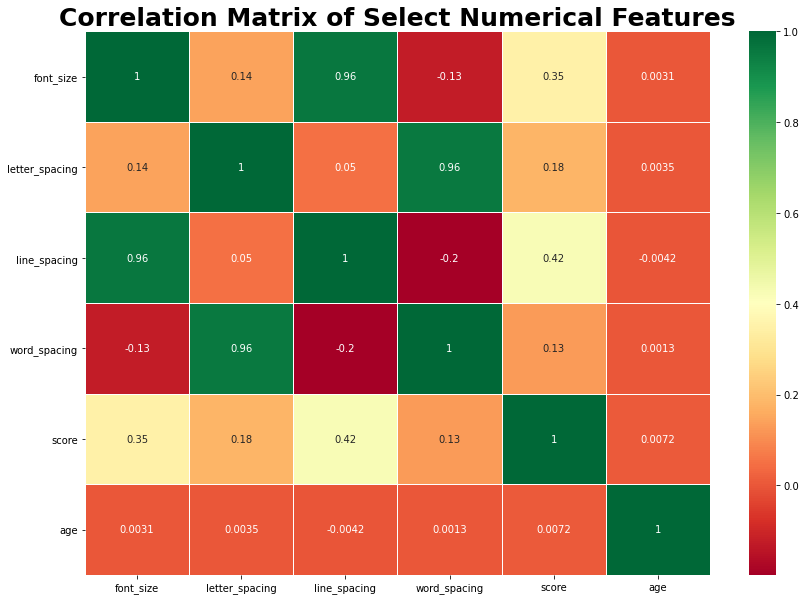

In [25]:
# Calculate the correlation matrix
corr_matrix = df[['font_size', 'letter_spacing', 'line_spacing', 'word_spacing', 'score', 'age']].corr()

# Set up the matplotlib figure
plt.figure(figsize=(14, 10))

# Generate a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='RdYlGn', linewidths=.5)

# Show plot with a title
plt.title('Correlation Matrix of Select Numerical Features', fontsize=25, weight='bold')
plt.yticks(rotation=0)
plt.show()

### Explore Test Score Results by Category

In [26]:
df.groupby('wcag_compliant')['score'].mean().sort_values(ascending=False)

wcag_compliant
True     82.652494
False    50.174005
Name: score, dtype: float64

In [27]:
df.groupby('wcag_compliant')['passing_score'].mean().sort_values(ascending=False)

wcag_compliant
True     0.841044
False    0.272325
Name: passing_score, dtype: float64

In [28]:
df.groupby(['disability_id','wcag_compliant'])['score'].mean()

disability_id  wcag_compliant
90000001       False             51.550814
               True              81.972132
90000002       False             48.566827
               True              85.046203
90000003       False             50.776716
               True              81.007631
Name: score, dtype: float64

In [29]:
df.groupby(['disability_id','wcag_compliant'])['passing_score'].mean()

disability_id  wcag_compliant
90000001       False             0.289902
               True              0.823529
90000002       False             0.245192
               True              0.905675
90000003       False             0.286765
               True              0.795707
Name: passing_score, dtype: float64

In [30]:
df.groupby(['disability_id','setting_type'])['score'].mean()

disability_id  setting_type
90000001       90000001A       81.566193
               90000001B       74.207862
               90000001C       86.029971
               90000001D       85.481924
               90000001E       51.550814
90000002       90000002A       85.898254
               90000002B       86.588235
               90000002C       82.700235
               90000002D       48.566827
90000003       90000003A       82.624350
               90000003B       83.889977
               90000003C       76.277586
               90000003D       50.776716
Name: score, dtype: float64

In [31]:
df.groupby(['disability_id','setting_type'])['passing_score'].mean()

disability_id  setting_type
90000001       90000001A       0.829545
               90000001B       0.613208
               90000001C       0.933718
               90000001D       0.900875
               90000001E       0.289902
90000002       90000002A       0.930175
               90000002B       0.917647
               90000002C       0.870588
               90000002D       0.245192
90000003       90000003A       0.834515
               90000003B       0.878788
               90000003C       0.667488
               90000003D       0.286765
Name: passing_score, dtype: float64

In [32]:
groupby_result = df.groupby(['disability_id', 'wcag_compliant'])['score'].mean().reset_index()
groupby_result

,disability_id,wcag_compliant,score
0,90000001,False,51.550814
1,90000001,True,81.972132
2,90000002,False,48.566827
3,90000002,True,85.046203
4,90000003,False,50.776716
5,90000003,True,81.007631


In [33]:
# Calculate the increase in score for each disability_id
score_increase = groupby_result.groupby('disability_id')['score'].diff()

# Create a new DataFrame with 'disability_id' and 'score_increase'
score_increase_df = pd.DataFrame({'disability_id': groupby_result['disability_id'], 'score_increase': score_increase})

# Drop rows with NaN values
score_increase_df.dropna(inplace=True)

# Set 'disability_id' as the index
score_increase_df.set_index('disability_id', inplace=True)

score_increase_df

,score_increase
disability_id,
90000001,30.421318
90000002,36.479376
90000003,30.230915


In [34]:
# Function to reorder a seaborn palette by value
def colors_from_values(values: pd.Series, palette_name:str, ascending=True):
    '''Returns a seaborn palette reordered by value
    Parameters:
    values: pd.Series
    palette_name:str, Seaborn valid palette name
    ascending: bool, optional color sort order
    '''
    # convert to indices
    values = values.sort_values(ascending=ascending).reset_index()
    indices = values.sort_values(by=values.columns[0]).index
    # use the indices to get the colors
    palette = sns.color_palette(palette_name, len(values))
    return np.array(palette).take(indices, axis=0)

### Visualizations of Test Score Results by Category

<ipython-input-35-4c5523aaf6a1>:167: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3[0, 0].set_xticklabels(ax3[0, 0].get_xticklabels(), rotation=90)
<ipython-input-35-4c5523aaf6a1>:175: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3[0, 1].set_xticklabels(ax3[0, 1].get_xticklabels(), rotation=90)


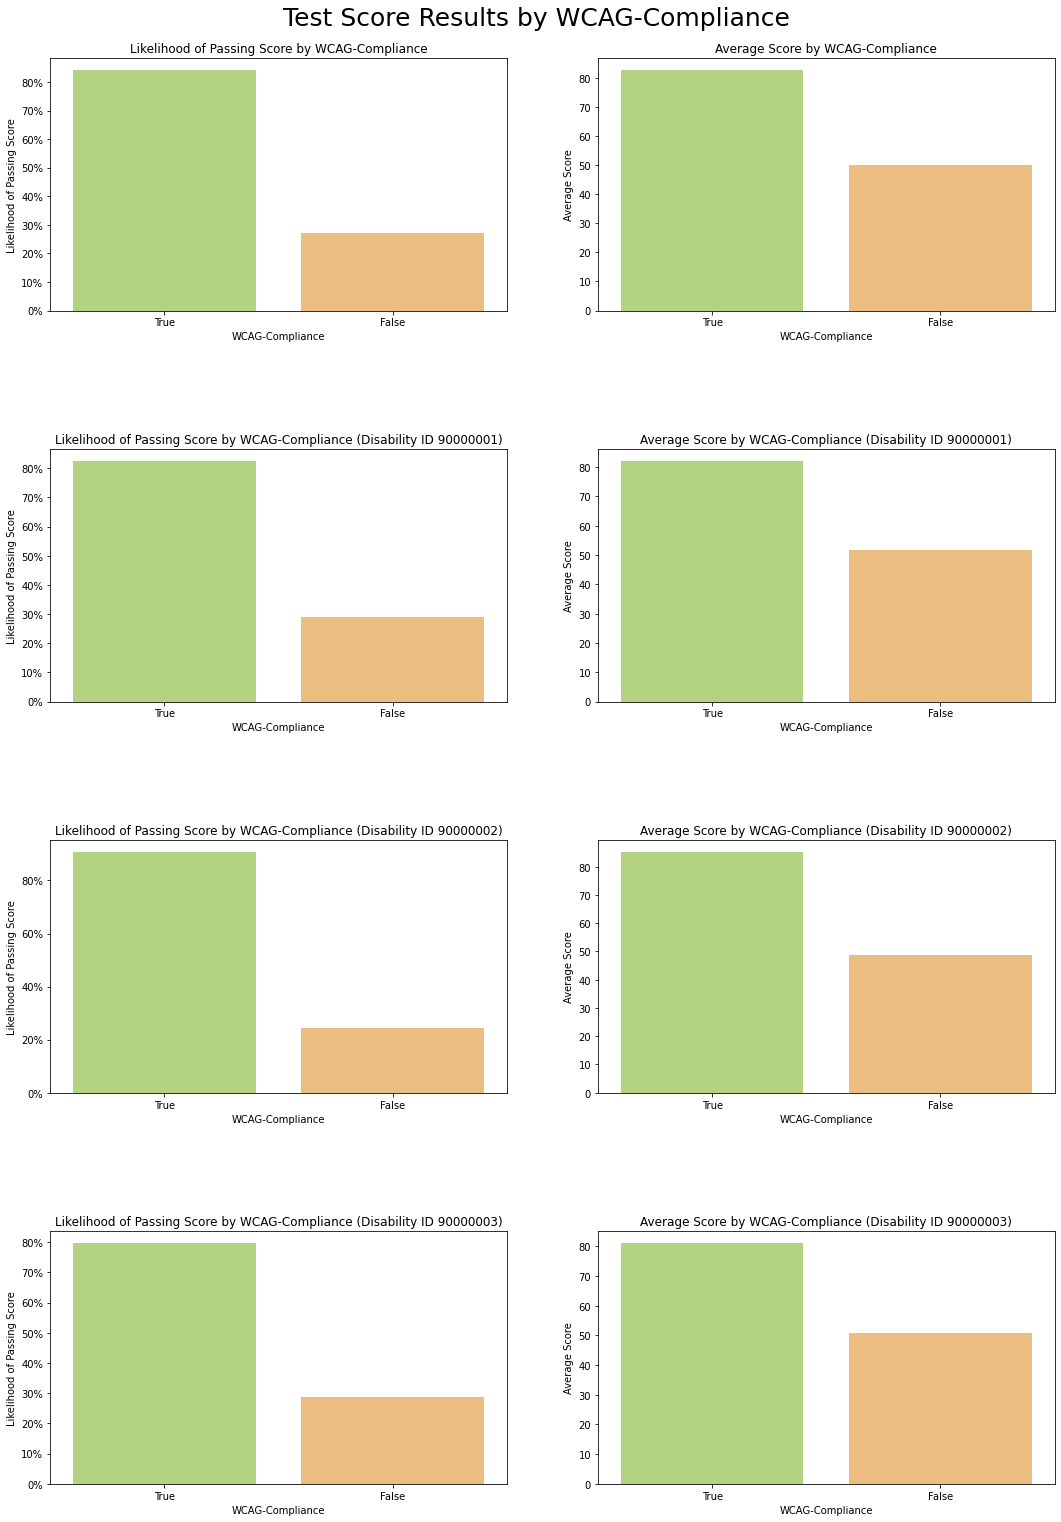

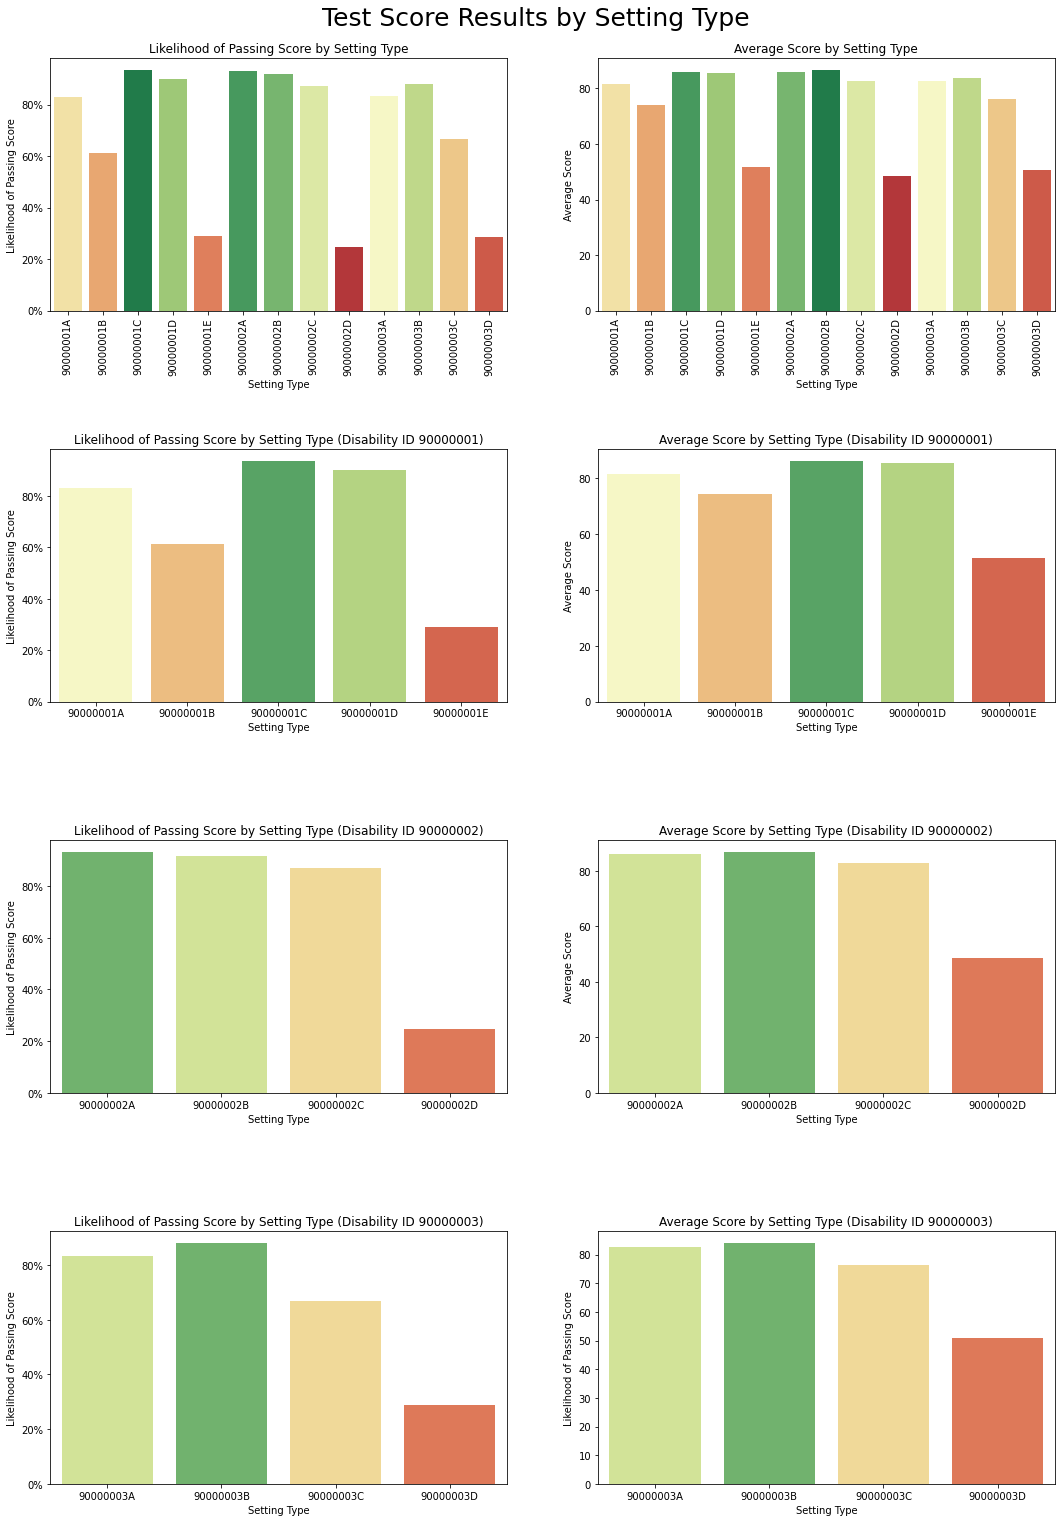

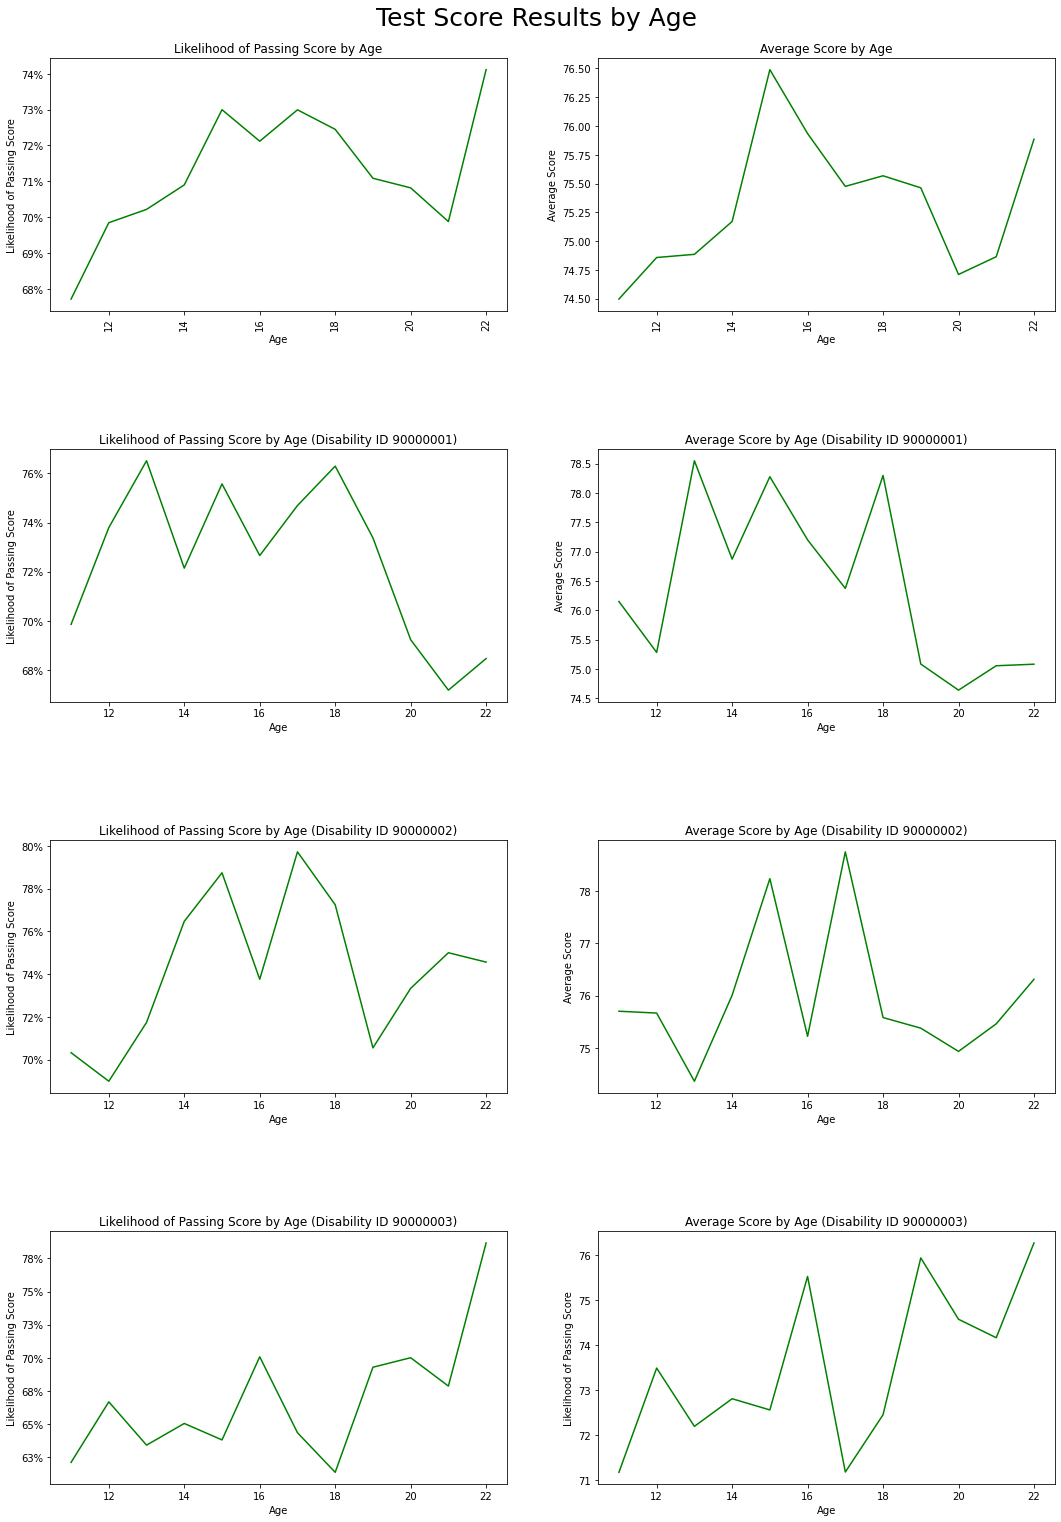

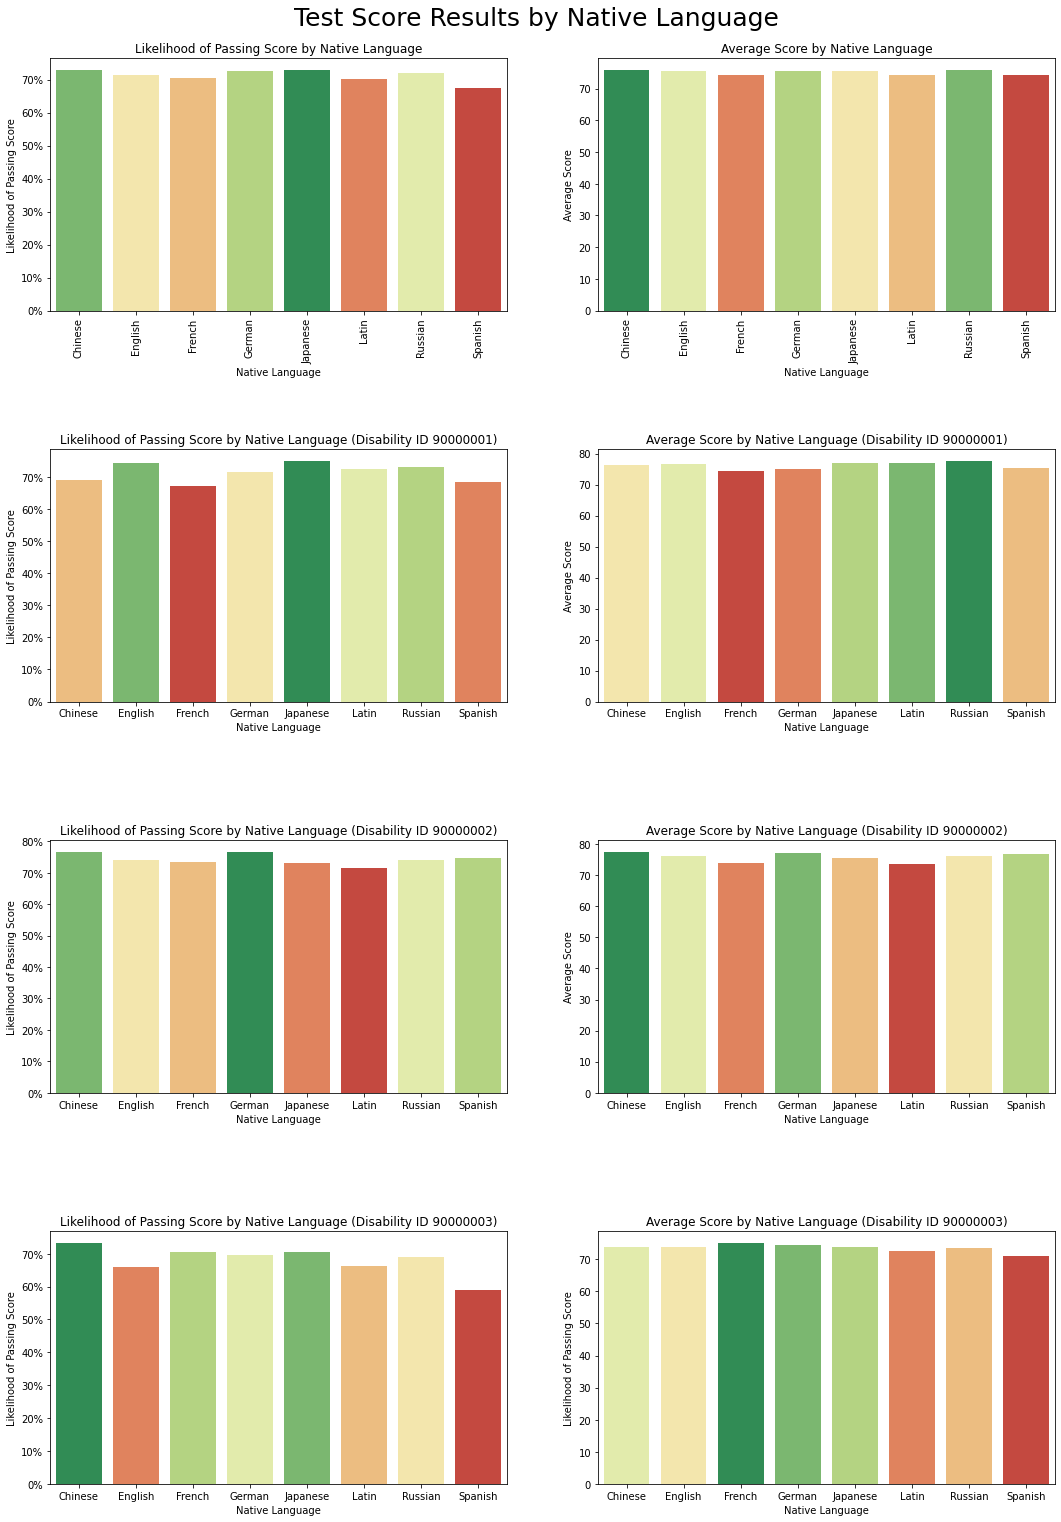

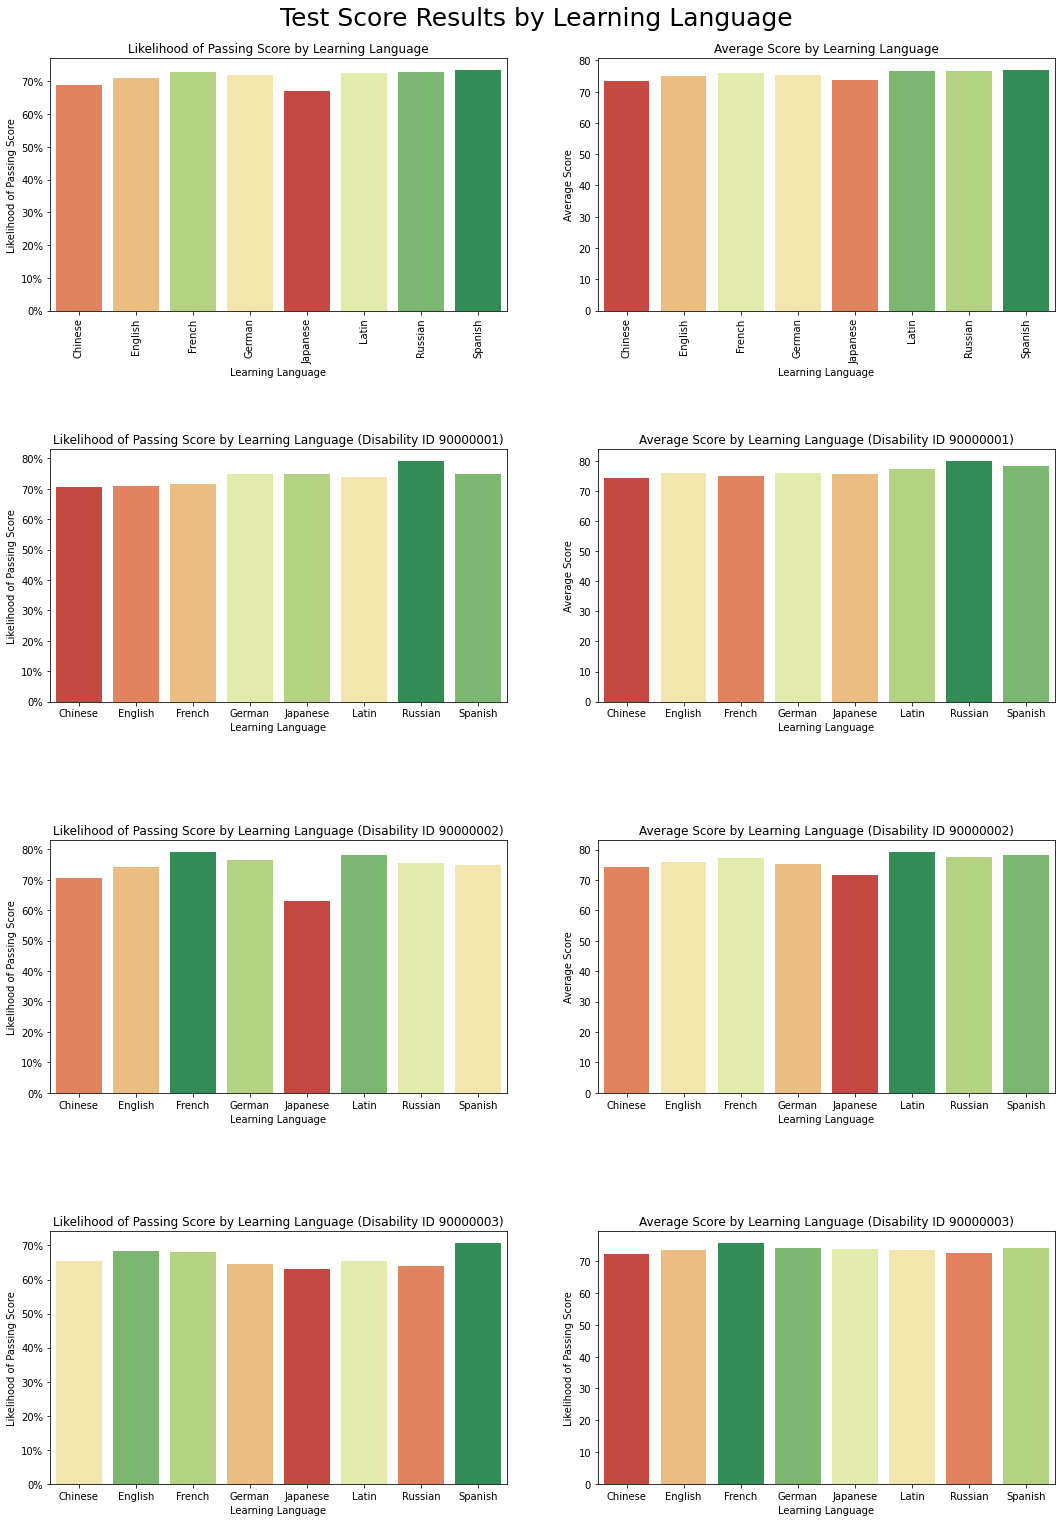

In [35]:
# Visualize test score results for various categories overall and for each disability ID


# Create separate dataframes stratified by disability ID
disability_90000001_df = df[df['disability_id'] == 90000001]
disability_90000002_df = df[df['disability_id'] == 90000002]
disability_90000003_df = df[df['disability_id'] == 90000003]


# Test Score Results by WCAG-Compliance

# WCAG-compliant settings result in a higher likelihood of a passing test score than non-WCAG-compliant settings

# WCAG-compliant settings allow for higher average test scores than non-WCAG-compliant settings

f1, ax1 = plt.subplots(4, 2, figsize =(18, 24))
f1.suptitle('Test Score Results by WCAG-Compliance', fontsize=25)
f1.subplots_adjust(top=0.95, hspace=0.55)

wcag_passing_df = df.groupby('wcag_compliant')['passing_score'].mean()
sorted_wcag_passing = wcag_passing_df.sort_values(ascending=False).index
sns.barplot(x='wcag_compliant', y='passing_score', data=df, order=sorted_wcag_passing,  ci=None, palette='RdYlGn_r', ax = ax1[0, 0])
ax1[0, 0].set_title('Likelihood of Passing Score by WCAG-Compliance')
ax1[0, 0].set_xlabel('WCAG-Compliance')
ax1[0, 0].set_ylabel('Likelihood of Passing Score')
ax1[0, 0].yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 

wcag_avg_score_df = df.groupby('wcag_compliant')['score'].mean()
sorted_wcag_avg_score = wcag_avg_score_df.sort_values(ascending=False).index
sns.barplot(x='wcag_compliant', y='score', data=df, order=sorted_wcag_avg_score,  ci=None, palette='RdYlGn_r', ax = ax1[0, 1])
ax1[0, 1].set_title('Average Score by WCAG-Compliance')
ax1[0, 1].set_xlabel('WCAG-Compliance')
ax1[0, 1].set_ylabel('Average Score')

wcag_passing_90000001_df = disability_90000001_df.groupby('wcag_compliant')['passing_score'].mean()
sorted_wcag_passing_90000001 = wcag_passing_90000001_df.sort_values(ascending=False).index
sns.barplot(x='wcag_compliant', y='passing_score', data=disability_90000001_df, order=sorted_wcag_passing_90000001,  ci=None, palette='RdYlGn_r', ax = ax1[1, 0])
ax1[1, 0].set_title('Likelihood of Passing Score by WCAG-Compliance (Disability ID 90000001)')
ax1[1, 0].set_xlabel('WCAG-Compliance')
ax1[1, 0].set_ylabel('Likelihood of Passing Score')
ax1[1, 0].yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 

wcag_avg_score_90000001_df = disability_90000001_df.groupby('wcag_compliant')['score'].mean()
sorted_wcag_avg_score_90000001 = wcag_avg_score_90000001_df.sort_values(ascending=False).index
sns.barplot(x='wcag_compliant', y='score', data=disability_90000001_df, order=sorted_wcag_avg_score_90000001,  ci=None, palette='RdYlGn_r', ax = ax1[1, 1])
ax1[1, 1].set_title('Average Score by WCAG-Compliance (Disability ID 90000001)')
ax1[1, 1].set_xlabel('WCAG-Compliance')
ax1[1, 1].set_ylabel('Average Score')

wcag_passing_90000002_df = disability_90000002_df.groupby('wcag_compliant')['passing_score'].mean()
sorted_wcag_passing_90000002 = wcag_passing_90000002_df.sort_values(ascending=False).index
sns.barplot(x='wcag_compliant', y='passing_score', data=disability_90000002_df, order=sorted_wcag_passing_90000002,  ci=None, palette='RdYlGn_r', ax = ax1[2, 0])
ax1[2, 0].set_title('Likelihood of Passing Score by WCAG-Compliance (Disability ID 90000002)')
ax1[2, 0].set_xlabel('WCAG-Compliance')
ax1[2, 0].set_ylabel('Likelihood of Passing Score')
ax1[2, 0].yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 

wcag_avg_score_90000002_df = disability_90000002_df.groupby('wcag_compliant')['score'].mean()
sorted_wcag_avg_score_90000002 = wcag_avg_score_90000002_df.sort_values(ascending=False).index
sns.barplot(x='wcag_compliant', y='score', data=disability_90000002_df, order=sorted_wcag_avg_score_90000002,  ci=None, palette='RdYlGn_r', ax = ax1[2, 1])
ax1[2, 1].set_title('Average Score by WCAG-Compliance (Disability ID 90000002)')
ax1[2, 1].set_xlabel('WCAG-Compliance')
ax1[2, 1].set_ylabel('Average Score')

wcag_passing_90000003_df = disability_90000003_df.groupby('wcag_compliant')['passing_score'].mean()
sorted_wcag_passing_90000003 = wcag_passing_90000003_df.sort_values(ascending=False).index
sns.barplot(x='wcag_compliant', y='passing_score', data=disability_90000003_df, order=sorted_wcag_passing_90000003,  ci=None, palette='RdYlGn_r', ax = ax1[3, 0])
ax1[3, 0].set_title('Likelihood of Passing Score by WCAG-Compliance (Disability ID 90000003)')
ax1[3, 0].set_xlabel('WCAG-Compliance')
ax1[3, 0].set_ylabel('Likelihood of Passing Score')
ax1[3, 0].yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 

wcag_avg_score_90000003_df = disability_90000003_df.groupby('wcag_compliant')['score'].mean()
sorted_wcag_avg_score_90000003 = wcag_avg_score_90000003_df.sort_values(ascending=False).index
sns.barplot(x='wcag_compliant', y='score', data=disability_90000003_df, order=sorted_wcag_avg_score_90000003,  ci=None, palette='RdYlGn_r', ax = ax1[3, 1])
ax1[3, 1].set_title('Average Score by WCAG-Compliance (Disability ID 90000003)')
ax1[3, 1].set_xlabel('WCAG-Compliance')
ax1[3, 1].set_ylabel('Average Score')


# Test Score Results by Setting Type

# WCAG-compliant settings result in a higher likelihood of a passing test score than non-WCAG-compliant settings

# WCAG-compliant settings allow for higher average test scores than non-WCAG-compliant settings

f2, ax2 = plt.subplots(4, 2, figsize =(18, 24))
f2.suptitle('Test Score Results by Setting Type', fontsize=25)
f2.subplots_adjust(top=0.95, hspace=0.55)

setting_passing_df = df.groupby('setting_type')['passing_score'].mean()
order_settings_passing = setting_passing_df.index.sort_values()
sns.barplot(x = setting_passing_df.index, y = setting_passing_df, ci=None, palette=colors_from_values(setting_passing_df, "RdYlGn"), order=order_settings_passing, ax = ax2[0, 0])
ax2[0, 0].set_title('Likelihood of Passing Score by Setting Type')
ax2[0, 0].set_xlabel('Setting Type')
ax2[0, 0].set_ylabel('Likelihood of Passing Score')
ax2[0, 0].set_xticklabels(ax2[0, 0].get_xticklabels(), rotation=90)
ax2[0, 0].yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 

setting_avg_score_df = df.groupby('setting_type')['score'].mean()
order_settings_avg_score = setting_avg_score_df.index.sort_values()
sns.barplot(x = setting_avg_score_df.index, y = setting_avg_score_df, ci=None, palette=colors_from_values(setting_avg_score_df, "RdYlGn"), order=order_settings_avg_score, ax = ax2[0, 1])
ax2[0, 1].set_title('Average Score by Setting Type')
ax2[0, 1].set_xlabel('Setting Type')
ax2[0, 1].set_ylabel('Average Score')
ax2[0, 1].set_xticklabels(ax2[0, 1].get_xticklabels(), rotation=90)

setting_passing_90000001_df = disability_90000001_df.groupby('setting_type')['passing_score'].mean()
order_settings_passing_90000001 = setting_passing_90000001_df.index.sort_values()
sns.barplot(x = setting_passing_90000001_df.index, y = setting_passing_90000001_df, ci=None, palette=colors_from_values(setting_passing_90000001_df, "RdYlGn"), order=order_settings_passing_90000001, ax = ax2[1, 0])
ax2[1, 0].set_title('Likelihood of Passing Score by Setting Type (Disability ID 90000001)')
ax2[1, 0].set_xlabel('Setting Type')
ax2[1, 0].set_ylabel('Likelihood of Passing Score')
ax2[1, 0].yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 

setting_avg_score_90000001_df = disability_90000001_df.groupby('setting_type')['score'].mean()
order_settings_avg_score_90000001 = setting_avg_score_90000001_df.index.sort_values()
sns.barplot(x = setting_avg_score_90000001_df.index, y = setting_avg_score_90000001_df, ci=None, palette=colors_from_values(setting_avg_score_90000001_df, "RdYlGn"), order=order_settings_avg_score_90000001, ax = ax2[1, 1])
ax2[1, 1].set_title('Average Score by Setting Type (Disability ID 90000001)')
ax2[1, 1].set_xlabel('Setting Type')
ax2[1, 1].set_ylabel('Average Score')

setting_passing_90000002_df = disability_90000002_df.groupby('setting_type')['passing_score'].mean()
order_settings_passing_90000002 = setting_passing_90000002_df.index.sort_values()
sns.barplot(x = setting_passing_90000002_df.index, y = setting_passing_90000002_df, ci=None, palette=colors_from_values(setting_passing_90000002_df, "RdYlGn"), order=order_settings_passing_90000002, ax = ax2[2, 0])
ax2[2, 0].set_title('Likelihood of Passing Score by Setting Type (Disability ID 90000002)')
ax2[2, 0].set_xlabel('Setting Type')
ax2[2, 0].set_ylabel('Likelihood of Passing Score')
ax2[2, 0].yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 

setting_avg_score_90000002_df = disability_90000002_df.groupby('setting_type')['score'].mean()
order_settings_avg_score_90000002 = setting_avg_score_90000002_df.index.sort_values()
sns.barplot(x = setting_avg_score_90000002_df.index, y = setting_avg_score_90000002_df, ci=None, palette=colors_from_values(setting_avg_score_90000002_df, "RdYlGn"), order=order_settings_avg_score_90000002, ax = ax2[2, 1])
ax2[2, 1].set_title('Average Score by Setting Type (Disability ID 90000002)')
ax2[2, 1].set_xlabel('Setting Type')
ax2[2, 1].set_ylabel('Average Score')

setting_passing_90000003_df = disability_90000003_df.groupby('setting_type')['passing_score'].mean()
order_settings_passing_90000003 = setting_passing_90000003_df.index.sort_values()
sns.barplot(x = setting_passing_90000003_df.index, y = setting_passing_90000003_df, ci=None, palette=colors_from_values(setting_passing_90000003_df, "RdYlGn"), order=order_settings_passing_90000003, ax = ax2[3, 0])
ax2[3, 0].set_title('Likelihood of Passing Score by Setting Type (Disability ID 90000003)')
ax2[3, 0].set_xlabel('Setting Type')
ax2[3, 0].set_ylabel('Likelihood of Passing Score')
ax2[3, 0].yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 

setting_avg_score_90000003_df = disability_90000003_df.groupby('setting_type')['score'].mean()
order_settings_avg_score_90000003 = setting_avg_score_90000003_df.index.sort_values()
sns.barplot(x = setting_avg_score_90000003_df.index, y = setting_avg_score_90000003_df, ci=None, palette=colors_from_values(setting_avg_score_90000003_df, "RdYlGn"), order=order_settings_avg_score_90000003, ax = ax2[3, 1])
ax2[3, 1].set_title('Average Score by Setting Type (Disability ID 90000003)')
ax2[3, 1].set_xlabel('Setting Type')
ax2[3, 1].set_ylabel('Likelihood of Passing Score')


# Test Score Results by Age

# No clear patterns are evident by age

f3, ax3 = plt.subplots(4, 2, figsize =(18, 24))
f3.suptitle('Test Score Results by Age', fontsize=25)
f3.subplots_adjust(top=0.95, hspace=0.55)

age_passing_df = df.groupby('age')['passing_score'].mean()
sns.lineplot(x = age_passing_df.index, y = age_passing_df, color = "green", ax = ax3[0, 0])
ax3[0, 0].set_title('Likelihood of Passing Score by Age')
ax3[0, 0].set_xlabel('Age')
ax3[0, 0].set_ylabel('Likelihood of Passing Score')
ax3[0, 0].set_xticklabels(ax3[0, 0].get_xticklabels(), rotation=90)
ax3[0, 0].yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 

age_avg_score_df = df.groupby('age')['score'].mean()
sns.lineplot(x = age_avg_score_df.index, y = age_avg_score_df, color = "green", ax = ax3[0, 1])
ax3[0, 1].set_title('Average Score by Age')
ax3[0, 1].set_xlabel('Age')
ax3[0, 1].set_ylabel('Average Score')
ax3[0, 1].set_xticklabels(ax3[0, 1].get_xticklabels(), rotation=90)

age_passing_90000001_df = disability_90000001_df.groupby('age')['passing_score'].mean()
sns.lineplot(x = age_passing_90000001_df.index, y = age_passing_90000001_df, color = "green", ax = ax3[1, 0])
ax3[1, 0].set_title('Likelihood of Passing Score by Age (Disability ID 90000001)')
ax3[1, 0].set_xlabel('Age')
ax3[1, 0].set_ylabel('Likelihood of Passing Score')
ax3[1, 0].yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 

age_avg_score_90000001_df = disability_90000001_df.groupby('age')['score'].mean()
sns.lineplot(x = age_avg_score_90000001_df.index, y = age_avg_score_90000001_df, color = "green", ax = ax3[1, 1])
ax3[1, 1].set_title('Average Score by Age (Disability ID 90000001)')
ax3[1, 1].set_xlabel('Age')
ax3[1, 1].set_ylabel('Average Score')

age_passing_90000002_df = disability_90000002_df.groupby('age')['passing_score'].mean()
sns.lineplot(x = age_passing_90000002_df.index, y = age_passing_90000002_df, color = "green", ax = ax3[2, 0])
ax3[2, 0].set_title('Likelihood of Passing Score by Age (Disability ID 90000002)')
ax3[2, 0].set_xlabel('Age')
ax3[2, 0].set_ylabel('Likelihood of Passing Score')
ax3[2, 0].yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 

age_avg_score_90000002_df = disability_90000002_df.groupby('age')['score'].mean()
sns.lineplot(x = age_avg_score_90000002_df.index, y = age_avg_score_90000002_df, color = "green", ax = ax3[2, 1])
ax3[2, 1].set_title('Average Score by Age (Disability ID 90000002)')
ax3[2, 1].set_xlabel('Age')
ax3[2, 1].set_ylabel('Average Score')

age_passing_90000003_df = disability_90000003_df.groupby('age')['passing_score'].mean()
sns.lineplot(x = age_passing_90000003_df.index, y = age_passing_90000003_df, color = "green", ax = ax3[3, 0])
ax3[3, 0].set_title('Likelihood of Passing Score by Age (Disability ID 90000003)')
ax3[3, 0].set_xlabel('Age')
ax3[3, 0].set_ylabel('Likelihood of Passing Score')
ax3[3, 0].yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 

age_avg_score_90000003_df = disability_90000003_df.groupby('age')['score'].mean()
sns.lineplot(x = age_avg_score_90000003_df.index, y = age_avg_score_90000003_df, color = "green", ax = ax3[3, 1])
ax3[3, 1].set_title('Average Score by Age (Disability ID 90000003)')
ax3[3, 1].set_xlabel('Age')
ax3[3, 1].set_ylabel('Likelihood of Passing Score')


# Test Score Results by Native Language

# No clear patterns are evident by native language

f4, ax4 = plt.subplots(4, 2, figsize =(18, 24))
f4.suptitle('Test Score Results by Native Language', fontsize=25)
f4.subplots_adjust(top=0.95, hspace=0.55)

native_language_passing_df = df.groupby('native_language')['passing_score'].mean()
order_native_language_passing = native_language_passing_df.index.sort_values()
sns.barplot(x = native_language_passing_df.index, y = native_language_passing_df, ci=None, palette=colors_from_values(native_language_passing_df, "RdYlGn"), order=order_native_language_passing, ax = ax4[0, 0])
ax4[0, 0].set_title('Likelihood of Passing Score by Native Language')
ax4[0, 0].set_xlabel('Native Language')
ax4[0, 0].set_ylabel('Likelihood of Passing Score')
ax4[0, 0].set_xticklabels(ax4[0, 0].get_xticklabels(), rotation=90)
ax4[0, 0].yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 

native_language_avg_score_df = df.groupby('native_language')['score'].mean()
order_native_language_avg_score = native_language_avg_score_df.index.sort_values()
sns.barplot(x = native_language_avg_score_df.index, y = native_language_avg_score_df, ci=None, palette=colors_from_values(native_language_avg_score_df, "RdYlGn"), order=order_native_language_avg_score, ax = ax4[0, 1])
ax4[0, 1].set_title('Average Score by Native Language')
ax4[0, 1].set_xlabel('Native Language')
ax4[0, 1].set_ylabel('Average Score')
ax4[0, 1].set_xticklabels(ax4[0, 1].get_xticklabels(), rotation=90)

native_language_passing_90000001_df = disability_90000001_df.groupby('native_language')['passing_score'].mean()
order_native_language_passing_90000001 = native_language_passing_90000001_df.index.sort_values()
sns.barplot(x = native_language_passing_90000001_df.index, y = native_language_passing_90000001_df, ci=None, palette=colors_from_values(native_language_passing_90000001_df, "RdYlGn"), order=order_native_language_passing_90000001, ax = ax4[1, 0])
ax4[1, 0].set_title('Likelihood of Passing Score by Native Language (Disability ID 90000001)')
ax4[1, 0].set_xlabel('Native Language')
ax4[1, 0].set_ylabel('Likelihood of Passing Score')
ax4[1, 0].yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 

native_language_avg_score_90000001_df = disability_90000001_df.groupby('native_language')['score'].mean()
order_native_language_avg_score_90000001 = native_language_avg_score_90000001_df.index.sort_values()
sns.barplot(x = native_language_avg_score_90000001_df.index, y = native_language_avg_score_90000001_df, ci=None, palette=colors_from_values(native_language_avg_score_90000001_df, "RdYlGn"), order=order_native_language_avg_score_90000001, ax = ax4[1, 1])
ax4[1, 1].set_title('Average Score by Native Language (Disability ID 90000001)')
ax4[1, 1].set_xlabel('Native Language')
ax4[1, 1].set_ylabel('Average Score')

native_language_passing_90000002_df = disability_90000002_df.groupby('native_language')['passing_score'].mean()
order_native_language_passing_90000002 = native_language_passing_90000002_df.index.sort_values()
sns.barplot(x = native_language_passing_90000002_df.index, y = native_language_passing_90000002_df, ci=None, palette=colors_from_values(native_language_passing_90000002_df, "RdYlGn"), order=order_native_language_passing_90000002, ax = ax4[2, 0])
ax4[2, 0].set_title('Likelihood of Passing Score by Native Language (Disability ID 90000002)')
ax4[2, 0].set_xlabel('Native Language')
ax4[2, 0].set_ylabel('Likelihood of Passing Score')
ax4[2, 0].yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 

native_language_avg_score_90000002_df = disability_90000002_df.groupby('native_language')['score'].mean()
order_native_language_avg_score_90000002 = native_language_avg_score_90000002_df.index.sort_values()
sns.barplot(x = native_language_avg_score_90000002_df.index, y = native_language_avg_score_90000002_df, ci=None, palette=colors_from_values(native_language_avg_score_90000002_df, "RdYlGn"), order=order_native_language_avg_score_90000002, ax = ax4[2, 1])
ax4[2, 1].set_title('Average Score by Native Language (Disability ID 90000002)')
ax4[2, 1].set_xlabel('Native Language')
ax4[2, 1].set_ylabel('Average Score')

native_language_passing_90000003_df = disability_90000003_df.groupby('native_language')['passing_score'].mean()
order_native_language_passing_90000003 = native_language_passing_90000003_df.index.sort_values()
sns.barplot(x = native_language_passing_90000003_df.index, y = native_language_passing_90000003_df, ci=None, palette=colors_from_values(native_language_passing_90000003_df, "RdYlGn"), order=order_native_language_passing_90000003, ax = ax4[3, 0])
ax4[3, 0].set_title('Likelihood of Passing Score by Native Language (Disability ID 90000003)')
ax4[3, 0].set_xlabel('Native Language')
ax4[3, 0].set_ylabel('Likelihood of Passing Score')
ax4[3, 0].yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 

native_language_avg_score_90000003_df = disability_90000003_df.groupby('native_language')['score'].mean()
order_native_language_avg_score_90000003 = native_language_avg_score_90000003_df.index.sort_values()
sns.barplot(x = native_language_avg_score_90000003_df.index, y = native_language_avg_score_90000003_df, ci=None, palette=colors_from_values(native_language_avg_score_90000003_df, "RdYlGn"), order=order_native_language_avg_score_90000003, ax = ax4[3, 1])
ax4[3, 1].set_title('Average Score by Native Language (Disability ID 90000003)')
ax4[3, 1].set_xlabel('Native Language')
ax4[3, 1].set_ylabel('Likelihood of Passing Score')


# Test Score Results by Learning Language

# No clear patterns are evident by learning language

f5, ax5 = plt.subplots(4, 2, figsize =(18, 24))
f5.suptitle('Test Score Results by Learning Language', fontsize=25)
f5.subplots_adjust(top=0.95, hspace=0.55)

learning_language_passing_df = df.groupby('learning_language')['passing_score'].mean()
order_learning_language_passing = learning_language_passing_df.index.sort_values()
sns.barplot(x = learning_language_passing_df.index, y = learning_language_passing_df, ci=None, palette=colors_from_values(learning_language_passing_df, "RdYlGn"), order=order_learning_language_passing, ax = ax5[0, 0])
ax5[0, 0].set_title('Likelihood of Passing Score by Learning Language')
ax5[0, 0].set_xlabel('Learning Language')
ax5[0, 0].set_ylabel('Likelihood of Passing Score')
ax5[0, 0].set_xticklabels(ax5[0, 0].get_xticklabels(), rotation=90)
ax5[0, 0].yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 

learning_language_avg_score_df = df.groupby('learning_language')['score'].mean()
order_learning_language_avg_score = learning_language_avg_score_df.index.sort_values()
sns.barplot(x = learning_language_avg_score_df.index, y = learning_language_avg_score_df, ci=None, palette=colors_from_values(learning_language_avg_score_df, "RdYlGn"), order=order_learning_language_avg_score, ax = ax5[0, 1])
ax5[0, 1].set_title('Average Score by Learning Language')
ax5[0, 1].set_xlabel('Learning Language')
ax5[0, 1].set_ylabel('Average Score')
ax5[0, 1].set_xticklabels(ax5[0, 1].get_xticklabels(), rotation=90)

learning_language_passing_90000001_df = disability_90000001_df.groupby('learning_language')['passing_score'].mean()
order_learning_language_passing_90000001 = learning_language_passing_90000001_df.index.sort_values()
sns.barplot(x = learning_language_passing_90000001_df.index, y = learning_language_passing_90000001_df, ci=None, palette=colors_from_values(learning_language_passing_90000001_df, "RdYlGn"), order=order_learning_language_passing_90000001, ax = ax5[1, 0])
ax5[1, 0].set_title('Likelihood of Passing Score by Learning Language (Disability ID 90000001)')
ax5[1, 0].set_xlabel('Learning Language')
ax5[1, 0].set_ylabel('Likelihood of Passing Score')
ax5[1, 0].yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 

learning_language_avg_score_90000001_df = disability_90000001_df.groupby('learning_language')['score'].mean()
order_learning_language_avg_score_90000001 = learning_language_avg_score_90000001_df.index.sort_values()
sns.barplot(x = learning_language_avg_score_90000001_df.index, y = learning_language_avg_score_90000001_df, ci=None, palette=colors_from_values(learning_language_avg_score_90000001_df, "RdYlGn"), order=order_learning_language_avg_score_90000001, ax = ax5[1, 1])
ax5[1, 1].set_title('Average Score by Learning Language (Disability ID 90000001)')
ax5[1, 1].set_xlabel('Learning Language')
ax5[1, 1].set_ylabel('Average Score')

learning_language_passing_90000002_df = disability_90000002_df.groupby('learning_language')['passing_score'].mean()
order_learning_language_passing_90000002 = learning_language_passing_90000002_df.index.sort_values()
sns.barplot(x = learning_language_passing_90000002_df.index, y = learning_language_passing_90000002_df, ci=None, palette=colors_from_values(learning_language_passing_90000002_df, "RdYlGn"), order=order_learning_language_passing_90000002, ax = ax5[2, 0])
ax5[2, 0].set_title('Likelihood of Passing Score by Learning Language (Disability ID 90000002)')
ax5[2, 0].set_xlabel('Learning Language')
ax5[2, 0].set_ylabel('Likelihood of Passing Score')
ax5[2, 0].yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 

learning_language_avg_score_90000002_df = disability_90000002_df.groupby('learning_language')['score'].mean()
order_learning_language_avg_score_90000002 = learning_language_avg_score_90000002_df.index.sort_values()
sns.barplot(x = learning_language_avg_score_90000002_df.index, y = learning_language_avg_score_90000002_df, ci=None, palette=colors_from_values(learning_language_avg_score_90000002_df, "RdYlGn"), order=order_learning_language_avg_score_90000002, ax = ax5[2, 1])
ax5[2, 1].set_title('Average Score by Learning Language (Disability ID 90000002)')
ax5[2, 1].set_xlabel('Learning Language')
ax5[2, 1].set_ylabel('Average Score')

learning_language_passing_90000003_df = disability_90000003_df.groupby('learning_language')['passing_score'].mean()
order_learning_language_passing_90000003 = learning_language_passing_90000003_df.index.sort_values()
sns.barplot(x = learning_language_passing_90000003_df.index, y = learning_language_passing_90000003_df, ci=None, palette=colors_from_values(learning_language_passing_90000003_df, "RdYlGn"), order=order_learning_language_passing_90000003, ax = ax5[3, 0])
ax5[3, 0].set_title('Likelihood of Passing Score by Learning Language (Disability ID 90000003)')
ax5[3, 0].set_xlabel('Learning Language')
ax5[3, 0].set_ylabel('Likelihood of Passing Score')
ax5[3, 0].yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 

learning_language_avg_score_90000003_df = disability_90000003_df.groupby('learning_language')['score'].mean()
order_learning_language_avg_score_90000003 = learning_language_avg_score_90000003_df.index.sort_values()
sns.barplot(x = learning_language_avg_score_90000003_df.index, y = learning_language_avg_score_90000003_df, ci=None, palette=colors_from_values(learning_language_avg_score_90000003_df, "RdYlGn"), order=order_learning_language_avg_score_90000003, ax = ax5[3, 1])
ax5[3, 1].set_title('Average Score by Learning Language (Disability ID 90000003)')
ax5[3, 1].set_xlabel('Learning Language')
ax5[3, 1].set_ylabel('Likelihood of Passing Score')


# Show the plots
plt.show()

After reviewing visuals, it is apparent that the highest predictor of both a passing test score and higher average test scores is WCAG-compliance, specifically:

- WCAG-compliant settings result in a higher likelihood of a passing test score than non-WCAG-compliant settings

- WCAG-compliant settings allow for higher average test scores than non-WCAG-compliant settings

I found no clear patterns where age, the native language or the learning language affect either the likelihood of a passing test score or the average test score.

### More Data Preparation

#### Drop columns not needed for modeling

In [36]:
df.drop(['user_id', 'first_name', 'last_name', 'username', 'date_of_birth', 'created_at','setting_id', 'profile_photo'], axis = 1, inplace = True)

In [37]:
# df.info()

#### Check for multicollinearity and drop columns as needed

In [38]:
df_nums = df.select_dtypes('number').drop(columns=['disability_id'])
df_nums.corr()

,font_size,letter_spacing,line_spacing,word_spacing,score,age
font_size,1.000000,0.144030,0.958489,-0.125540,0.347199,0.003130
letter_spacing,0.144030,1.000000,0.050311,0.956587,0.179412,0.003465
line_spacing,0.958489,0.050311,1.000000,-0.197261,0.421058,-0.004208
word_spacing,-0.125540,0.956587,-0.197261,1.000000,0.126343,0.001323
score,0.347199,0.179412,0.421058,0.126343,1.000000,0.007218
age,0.003130,0.003465,-0.004208,0.001323,0.007218,1.000000


In [39]:
df.drop(['line_spacing', 'letter_spacing'], axis = 1, inplace = True)

Font size and line spacing are highly correlated. That is because the optimal line spacing according to WCAG guidelines is 1.5 times or 150% of the font size. I will keep **font_size** and drop **line_spacing**.

Similarly, word spacing and letter spacing are highly correlated. WCAG guidelines suggest that letter spacing should be 35% more than average letter width (based on font). They also suggest that word spacing should be 3.5 times more than the line spacing. Since I am dropping **line_spacing**, it should be okay to keep **word_spacing**.

# Models

### Define predictor (X) and target (y) variables

In [40]:
# Dependent variables are all variables except test scores
X = df.drop(['score', 'passing_score'], axis=1)

# Target (y) variable is the test score
y = df['score'].astype(int)
other_y = df['passing_score']

### Split the data between train and test sets

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 777, stratify = y, test_size = 0.3)

### Perform one-hot encoding for categorical columns

In [42]:
# Specify the categorical columns to encode
X_train_cat = X_train.select_dtypes('object')
X_test_cat = X_test.select_dtypes('object')

# Create an instance of the OneHotEncoder
ohe = OneHotEncoder(drop = 'first', sparse_output = False)

# Transform the categorical columns in both the training and testing sets
X_train_dummies = pd.DataFrame(ohe.fit_transform(X_train_cat), columns=ohe.get_feature_names_out(), index=X_train_cat.index)
X_test_dummies = pd.DataFrame(ohe.fit_transform(X_test_cat), columns=ohe.get_feature_names_out(), index=X_test_cat.index)

### Normalize numerical columns by scaling the train and test sets

In [43]:
# Specify the numerical columns to scale
X_train_nums = X_train.select_dtypes('number')
X_test_nums = X_test.select_dtypes('number')

# Create an instance of the StandardScaler
ss = StandardScaler()

# Transform the numerical columns in both the training and testing sets
X_train_scaled = pd.DataFrame(ss.fit_transform(X_train_nums), index = X_train_nums.index)
X_test_scaled = pd.DataFrame(ss.fit_transform(X_test_nums), index = X_test_nums.index)

X_train_scaled.columns = X_train_nums.columns
X_test_scaled.columns = X_test_nums.columns


### Merge the pre-processed categorical and numerical columns

In [44]:
X_train_preprocessed = pd.concat([X_train_scaled, X_train_dummies], axis = 1)
X_test_preprocessed = pd.concat([X_test_scaled, X_test_dummies], axis = 1)

X_train_preprocessed.columns = X_train_preprocessed.columns.astype(str)
X_test_preprocessed.columns = X_test_preprocessed.columns.astype(str)

## Evaluate base models prior to thorough feature selection

### MODEL 1: Apply a Dummy Classifier as the Baseline Model

I used a DummyRegressor as a simple baseline model so I can compare its accuracy to more complex regression models that take input features in consideration. It uses simple rules, but is useful as a simple baseline to compare with other (real) regressors.

In [45]:
# Create a baseline model
dummy_model = DummyRegressor(strategy = 'mean')

# Train the model on the preprocessed training data
dummy_model.fit(X_train_preprocessed, y_train)

# Predict on the testing data
y_pred_dummy = dummy_model.predict(X_test_preprocessed)

# Evaluate the model's performance using regression metrics
mse_dummy = mean_squared_error(y_test, y_pred_dummy)
mae_dummy = mean_absolute_error(y_test, y_pred_dummy)

print(f'Mean Squared Error: {mse_dummy}')
print(f'Mean Absolute Error: {mae_dummy}')

Mean Squared Error: 468.9881517006803
Mean Absolute Error: 16.390415619047616


### MODEL 2: Apply a Decision Tree Model

Next, I used a Decision Tree Regressor to predict the value of the test score variable based on several input variables. This will help to identify predictors that could be more useful in subsequent models.

To reduce overfitting, I initially set the maximum depth of the decision tree classifier to 3.

In [46]:
# Create an instance of the DecisionTreeRegressor
dt_model = DecisionTreeRegressor(max_depth = 3, random_state = 777)

# Train the model on the preprocessed training data
dt_model.fit(X_train_preprocessed, y_train)

# Predict on the testing data
y_pred_dt = dt_model.predict(X_test_preprocessed)

# Evaluate the model's performance using regression metrics
mse_dt = mean_squared_error(y_test, y_pred_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)

print(f'Mean Squared Error: {mse_dt}')
print(f'Mean Absolute Error: {mae_dt}')

Mean Squared Error: 281.74403354401676
Mean Absolute Error: 12.671375759408013


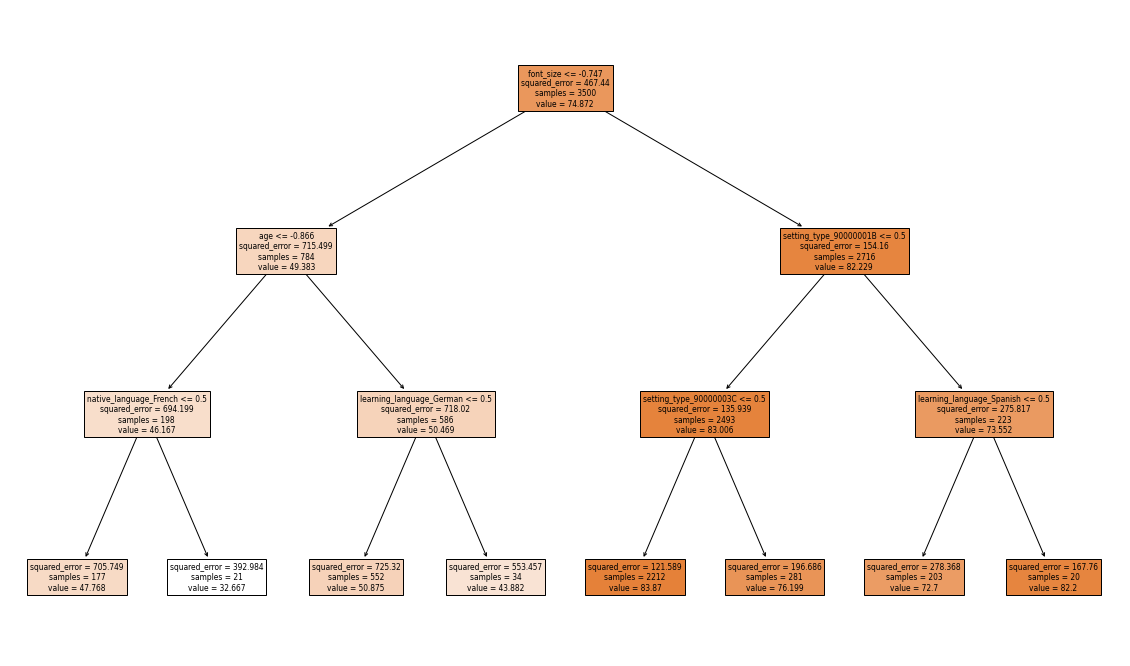

In [47]:
# Plot the decision tree
plt.figure(figsize=(20, 12))
tree.plot_tree(dt_model, feature_names = X_train_preprocessed.columns, filled = True)
plt.show()

In [48]:
# Initialize an empty dictionary to store feature importances
feature_imp = {}

# Iterate over feature importances and feature names
for fi, feature in zip(dt_model.feature_importances_, dt_model.feature_names_in_):
    # Assign the feature importance to the corresponding feature name in the dictionary
    feature_imp[feature] = fi

# The feature_imp dictionary now contains feature names as keys and their importances as values
feature_imp

{'disability_id': 0.0,
 'font_size': 0.9382539096238737,
 'word_spacing': 0.0,
 'age': 0.0039162499546121,
 'native_language_English': 0.0,
 'native_language_French': 0.006119798403883256,
 'native_language_German': 0.0,
 'native_language_Japanese': 0.0,
 'native_language_Latin': 0.0,
 'native_language_Russian': 0.0,
 'native_language_Spanish': 0.0,
 'learning_language_English': 0.0,
 'learning_language_French': 0.0,
 'learning_language_German': 0.0022385250376346405,
 'learning_language_Japanese': 0.0,
 'learning_language_Latin': 0.0,
 'learning_language_Russian': 0.0,
 'learning_language_Spanish': 0.0023489392233119037,
 'setting_type_90000001B': 0.02615117328582494,
 'setting_type_90000001C': 0.0,
 'setting_type_90000001D': 0.0,
 'setting_type_90000001E': 0.0,
 'setting_type_90000002A': 0.0,
 'setting_type_90000002B': 0.0,
 'setting_type_90000002C': 0.0,
 'setting_type_90000002D': 0.0,
 'setting_type_90000003A': 0.0,
 'setting_type_90000003B': 0.0,
 'setting_type_90000003C': 0.02097

In [49]:
# Create a second instance of the DecisionTreeClassifier with less pruning
dt_model2 = DecisionTreeRegressor(max_depth = 4, random_state = 777)

# Train the model on the preprocessed training data
dt_model2.fit(X_train_preprocessed, y_train)

# Predict on the testing data
y_pred_dt2 = dt_model2.predict(X_test_preprocessed)

# Evaluate the model's performance using regression metrics
mse_dt2 = mean_squared_error(y_test, y_pred_dt2)
mae_dt2 = mean_absolute_error(y_test, y_pred_dt2)

print(f'Mean Squared Error: {mse_dt2}')
print(f'Mean Absolute Error: {mae_dt2}')

Mean Squared Error: 281.939091890396
Mean Absolute Error: 12.635924379893728


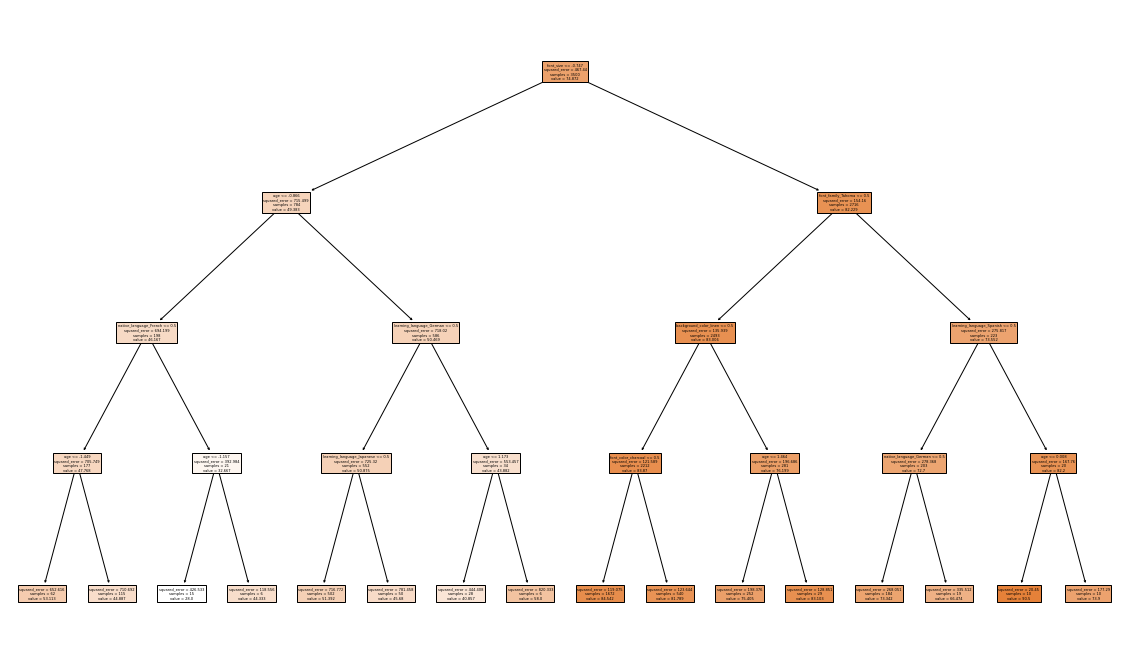

In [50]:
# Plot the decision tree
plt.figure(figsize=(20, 12))
tree.plot_tree(dt_model2, feature_names = X_train_preprocessed.columns, filled = True)
plt.show()

In [51]:
# Initialize an empty dictionary to store feature importances for dt_model2
feature_imp2 = {}

# Iterate over feature importances and feature names for dt_model2
for fi, feature in zip(dt_model2.feature_importances_, dt_model2.feature_names_in_):
    # Assign the feature importance to the corresponding feature name in the dictionary
    feature_imp2[feature] = fi

# The feature_imp2 dictionary now contains feature names as keys and their importances as values for dt_model2
feature_imp2

{'disability_id': 0.0,
 'font_size': 0.9203212723415287,
 'word_spacing': 0.0,
 'age': 0.015395269109003736,
 'native_language_English': 0.0,
 'native_language_French': 0.006002832064716168,
 'native_language_German': 0.0011392074539501884,
 'native_language_Japanese': 0.0,
 'native_language_Latin': 0.0,
 'native_language_Russian': 0.0,
 'native_language_Spanish': 0.0,
 'learning_language_English': 0.0,
 'learning_language_French': 0.0,
 'learning_language_German': 0.0021957406088828945,
 'learning_language_Japanese': 0.00208043382782487,
 'learning_language_Latin': 0.0,
 'learning_language_Russian': 0.0,
 'learning_language_Spanish': 0.0023040444729060016,
 'setting_type_90000001B': 0.0,
 'setting_type_90000001C': 0.0,
 'setting_type_90000001D': 0.0,
 'setting_type_90000001E': 0.0,
 'setting_type_90000002A': 0.0,
 'setting_type_90000002B': 0.0,
 'setting_type_90000002C': 0.0,
 'setting_type_90000002D': 0.0,
 'setting_type_90000003A': 0.0,
 'setting_type_90000003B': 0.0,
 'setting_type

### MODEL 3: Apply a Linear Regression Model prior to Feature Selection

In [52]:
# Create an instance of the linear regression model
linreg_base_model = LinearRegression()

# Train the model on the preprocessed training data
linreg_base_model.fit(X_train_preprocessed, y_train)

# Predict on the testing data
y_pred_linreg_base = linreg_base_model.predict(X_test_preprocessed)

# Calculate the coefficient of determination of the prediction on the train data
r2_train_linreg_base = linreg_base_model.score(X_train_preprocessed, y_train)

# Evaluate the model's performance using regression metrics
mse_linreg_base = mean_squared_error(y_test, y_pred_linreg_base)
mae_linreg_base = mean_absolute_error(y_test, y_pred_linreg_base)
r2_test_linreg_base = r2_score(y_test, y_pred_linreg_base)

print(f'Coefficients: {linreg_base_model.coef_}\n')
print(f'Y-Intercept: {linreg_base_model.intercept_}\n')

print(f'Coefficient of Determination (R-Square), Train Data: {r2_train_linreg_base}')
print(f'Coefficient of Determination (R-Square), Test Data: {r2_test_linreg_base}\n')
print(f'Mean Squared Error: {mse_linreg_base}')
print(f'Mean Absolute Error: {mae_linreg_base}')

Coefficients: [ 6.43565243e+14 -3.62948859e+14  2.75054391e+14  4.06250000e-01
 -1.51084259e+13 -8.98437500e-01 -1.08789062e+00 -9.26269531e-01
 -1.92431641e+00 -1.87255859e+00 -6.79931641e-01 -1.51084259e+13
  2.48254395e+00  1.51745605e+00  1.07098389e+00  3.23489380e+00
  3.41754150e+00  3.23006725e+00  1.38183049e+14  1.57589081e+14
  6.14081810e+12 -4.15161553e+13 -5.47428724e+14  1.83939002e+14
 -1.71558879e+14  4.74638211e+13  1.02933812e+14 -8.48576432e+13
 -1.38297572e+14 -1.49638621e+14  1.03025681e+15  3.07718676e+14
  3.28171153e+13  1.37292586e+14 -5.55655998e+12  1.17884229e+14
 -1.24214260e+14  2.46749927e+14 -5.20787463e+14  1.71913033e+12
  1.04920970e+14  3.36402766e+14 -3.20149413e+14 -1.09050122e+14
  4.82574772e+13 -2.77666085e+14  1.46155991e+14 -4.55689936e+13
  6.54576694e+13  1.38638050e+14 -3.42658689e+14  1.12187398e+14
  1.47101081e+14  1.01733499e+14  1.10253155e+15  5.36457347e+13
  3.81820049e+14  4.03559397e+14  1.14824919e+14]

Y-Intercept: -59996393190

### MODEL 4: Apply a Lasso Regression Model prior to Feature Selection

In [53]:
# Create an instance of the Lasso regression model
lassoreg_base_model = Lasso(random_state = 777)

# Train the model on the preprocessed training data
lassoreg_base_model.fit(X_train_preprocessed, y_train)

# Predict on the testing data
y_pred_lassoreg_base = lassoreg_base_model.predict(X_test_preprocessed)

# Calculate the coefficient of determination of the prediction on the train data
r2_train_lassoreg_base = lassoreg_base_model.score(X_train_preprocessed, y_train)

# Evaluate the model's performance using regression metrics
mse_lassoreg_base = mean_squared_error(y_test, y_pred_lassoreg_base)
mae_lassoreg_base = mean_absolute_error(y_test, y_pred_lassoreg_base)
r2_test_lassoreg_base = r2_score(y_test, y_pred_lassoreg_base)

print(f'Coefficients: {lassoreg_base_model.coef_}\n')
print(f'Y-Intercept: {lassoreg_base_model.intercept_}\n')

print(f'Coefficient of Determination (R-Square), Train Data: {r2_train_lassoreg_base}')
print(f'Coefficient of Determination (R-Square), Test Data: {r2_test_lassoreg_base}\n')
print(f'Mean Squared Error: {mse_lassoreg_base}')
print(f'Mean Absolute Error: {mae_lassoreg_base}')

Coefficients: [-3.29965263e+00  8.92835450e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00 -3.93812997e-02  0.00000000e+00  3.11385127e+00
  0.00000000e+00 -2.91320265e+00  0.00000000e+00  0.00000000e+00
 -4.55926165e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00  2.74510409e-01
  0.00000000e+00  0.00000000e+00 -1.10809029e-03 -3.72997253e-01
  1.67195590e-02  0.00000000e+00  5.44033709e-01 -3.55605811e-04
 -1.23912178e-01  0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  3.46919827e-02  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00]

Y-Intercept: 75.142804259

### MODEL 5: Apply a Ridge Regression Model prior to Feature Selection

In [54]:
# Create an instance of the Ridge regression model
ridgereg_base_model = Ridge(random_state = 777)

# Train the model on the preprocessed training data
ridgereg_base_model.fit(X_train_preprocessed, y_train)

# Predict on the testing data
y_pred_ridgereg_base = ridgereg_base_model.predict(X_test_preprocessed)

# Calculate the coefficient of determination of the prediction on the train data
r2_train_ridgereg_base = ridgereg_base_model.score(X_train_preprocessed, y_train)

# Evaluate the model's performance using regression metrics
mse_ridgereg_base = mean_squared_error(y_test, y_pred_ridgereg_base)
mae_ridgereg_base = mean_absolute_error(y_test, y_pred_ridgereg_base)
r2_test_ridgereg_base = r2_score(y_test, y_pred_ridgereg_base)

print(f'Coefficients: {ridgereg_base_model.coef_}\n')
print(f'Y-Intercept: {ridgereg_base_model.intercept_}\n')

print(f'Coefficient of Determination (R-Square), Train Data: {r2_train_ridgereg_base}')
print(f'Coefficient of Determination (R-Square), Test Data: {r2_test_ridgereg_base}\n')
print(f'Mean Squared Error: {mse_ridgereg_base}')
print(f'Mean Absolute Error: {mae_ridgereg_base}')

Coefficients: [-3.19986092  7.12075641  0.87506116  0.49851769 -1.7027465  -1.22881791
 -1.11687352 -0.53890235 -1.6089788  -1.86966688 -0.68238976  1.7027465
  2.61799358  1.26603193  0.95551062  3.37242674  3.69878997  3.11016932
 -1.50625177  3.30927185  0.90288041 -5.63629226  4.46228153  4.06067977
  4.37875388 -5.22967828  2.14575662  2.21070786 -5.28047752 -4.2176859
 -0.50166984  4.46228153 -4.2176859  -1.50625177  0.90288041  4.06067977
  2.14575662  3.30927185 -5.63629226 -5.22967828  4.06067977  3.30927185
  5.2816343  -5.28047752 -5.22967828  0.4000538  -1.50625177  2.21070786
  2.14575662 -5.63629226 -4.2176859  -2.14575662 -0.85092439  4.06067977
 -0.27113031  2.14575662  2.21070786 -1.50625177  0.4000538 ]

Y-Intercept: 75.71984875523836

Coefficient of Determination (R-Square), Train Data: 0.42870424021097153
Coefficient of Determination (R-Square), Test Data: 0.4045363115509788

Mean Squared Error: 279.2624650340229
Mean Absolute Error: 12.623963011181592


### MODEL 6: Apply an ElasticNet Regression Model prior to Feature Selection

In [55]:
# Create an instance of the ElasticNet regression model
elasticnetreg_base_model = ElasticNet(random_state = 777)

# Train the model on the preprocessed training data
elasticnetreg_base_model.fit(X_train_preprocessed, y_train)

# Predict on the testing data
y_pred_elasticnetreg_base = elasticnetreg_base_model.predict(X_test_preprocessed)

# Calculate the coefficient of determination of the prediction on the train data
r2_train_elasticnetreg_base = elasticnetreg_base_model.score(X_train_preprocessed, y_train)

# Evaluate the model's performance using regression metrics
mse_elasticnetreg_base = mean_squared_error(y_test, y_pred_elasticnetreg_base)
mae_elasticnetreg_base = mean_absolute_error(y_test, y_pred_elasticnetreg_base)
r2_test_elasticnetreg_base = r2_score(y_test, y_pred_elasticnetreg_base)

print(f'Coefficients: {elasticnetreg_base_model.coef_}\n')
print(f'Y-Intercept: {elasticnetreg_base_model.intercept_}\n')

print(f'Coefficient of Determination (R-Square), Train Data: {r2_train_elasticnetreg_base}')
print(f'Coefficient of Determination (R-Square), Test Data: {r2_test_elasticnetreg_base}\n')
print(f'Mean Squared Error: {mse_elasticnetreg_base}')
print(f'Mean Absolute Error: {mae_elasticnetreg_base}')

Coefficients: [-0.78296962  4.57866484  1.09411722  0.         -0.          0.
  0.          0.         -0.         -0.         -0.          0.
  0.         -0.         -0.          0.          0.          0.
 -0.          0.27893952  0.         -1.08125539  0.4013236   0.7879179
  0.12846592 -1.51667679  0.12410917  0.         -0.31106295 -1.38509822
  0.          0.40132634 -1.38510176 -0.          0.          0.78791943
  0.12410837  0.27894164 -1.08125222 -1.51667617  0.78792015  0.2789436
  1.02252101 -0.31106835 -1.51667624  0.         -0.          0.
  0.12410531 -1.08124877 -1.38510775 -0.12410235 -0.38820115  0.78792139
  0.          0.12409711  0.         -0.          0.        ]

Y-Intercept: 75.40641902336148

Coefficient of Determination (R-Square), Train Data: 0.2210005294278362
Coefficient of Determination (R-Square), Test Data: 0.21127832461423557

Mean Squared Error: 369.8972138296052
Mean Absolute Error: 14.787207678752452


## Interpretation of Base Model Results and Next Steps

Of all the different base models (dummy, decision tree, linear regression, lasso, ridge and elasticNet), ridge regression has the best performance with the lowest erros and highest explanatory R-square value. The Mean Squared Error (MSE) of 279.2 and Mean Absolute Error (MAE) of 12.6 is the lowest of all the models. The Coefficients of Determination (R-Squareds) show that approximately 42.9% of the variance in the training data test scores is explained by the ridge regression model, and approximately 40.5% of the variance in the test data test scores is explained by the ridge regression model.

However, before selecting a final model and interpreting the results, I can refine the models by selecting only important features, cross validating, and tuning hyperparameters.

## Feature Importance and Selection

In [56]:
# Extract feature names
feature_names = X_train_preprocessed.columns

# Create a boolean mask for non-zero coefficients based on the Lasso regression results
non_zero_mask = np.abs(lassoreg_base_model.coef_) > 0

# Filter important features
important_features = feature_names[non_zero_mask]

# Display the important features based on the Lasso regression results
print("Important Features:")
print(important_features)

Important Features:
Index(['disability_id', 'font_size', 'setting_type_90000001E',
       'setting_type_90000002B', 'setting_type_90000002D',
       'setting_type_90000003C', 'font_color_midnight blue',
       'font_color_white', 'font_color_yellow', 'background_color_ivory',
       'background_color_light gray', 'background_color_linen',
       'background_color_orange', 'font_family_Lexend'],
      dtype='object')


Based on the Lasso regression results, it makes sense to keep the 'setting_type' column. Since the 'font_color', 'font_size', 'background_color' and 'font_family' are associated with specific 'setting_type'(s), we can drop them and keep the 'setting_type'(s). We don't want variables that are dependent on each other.

### Update the Dataset and Rerun the Models
Create a new dataset that includes only the important features identified in the Lasso regression results, ensuring all selected variable are unrelated and independent.

In [57]:
selected_columns = ['setting_type']
X_selected = X[selected_columns]

### Split the updated dataset between train and test sets

In [58]:
X_selected_train, X_selected_test, y_train, y_test = train_test_split(X_selected, y, random_state = 777, stratify = y, test_size = 0.3)

### Perform one-hot encoding for categorical columns

In [59]:
# Specify the categorical columns to encode
X_selected_train_cat = X_selected_train.select_dtypes('object')
X_selected_test_cat = X_selected_test.select_dtypes('object')

# Transform the categorical columns in both the training and testing sets
X_selected_train_dummies = pd.DataFrame(ohe.fit_transform(X_selected_train_cat), columns=ohe.get_feature_names_out(), index=X_selected_train_cat.index)
X_selected_test_dummies = pd.DataFrame(ohe.fit_transform(X_selected_test_cat), columns=ohe.get_feature_names_out(), index=X_selected_test_cat.index)

X_selected_train_dummies.columns = X_selected_train_dummies.columns.astype(str)
X_selected_test_dummies.columns = X_selected_test_dummies.columns.astype(str)

### Generate Feature Importance Plots

Ensemble models like Random Forest or Gradient Boosting inherently provide feature importance scores. Here, I use RandomForestRegressor.

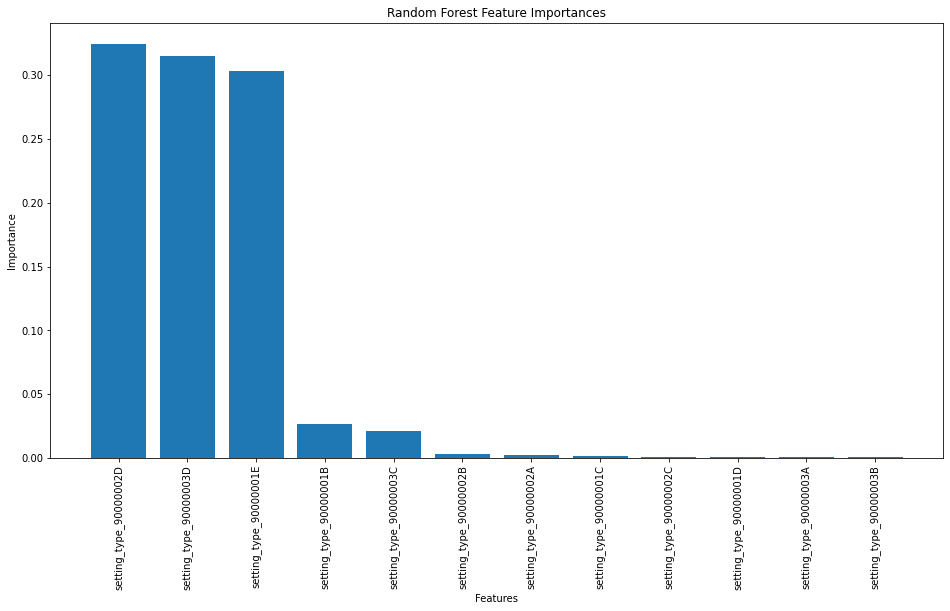

In [60]:
# Create an instance of the RandomForestRegressor model
rfreg_model = RandomForestRegressor(random_state=777)

# Fit the RandomForestRegressor model on the important features
rfreg_model.fit(X_selected_train_dummies, y_train)

# Plot feature importances
feature_importances = rfreg_model.feature_importances_
sorted_idx = feature_importances.argsort()[::-1]
features = X_selected_train_dummies.columns

fig, ax = plt.subplots(figsize=(16, 8))  # Adjust the width (16) and height (8) based on your preference
plt.bar(range(X_selected_train_dummies.shape[1]), feature_importances[sorted_idx], align="center")
plt.xticks(range(X_selected_train_dummies.shape[1]), features[sorted_idx], rotation='vertical')
ax.set_xlabel('Features')  # Label for the x-axis
ax.set_ylabel('Importance')  # Label for the y-axis
plt.title("Random Forest Feature Importances")
plt.show()

The features with the greatest permutation importance in determining the score are the non-WCAG setting types, which lead to poor scores across all three disability types. 

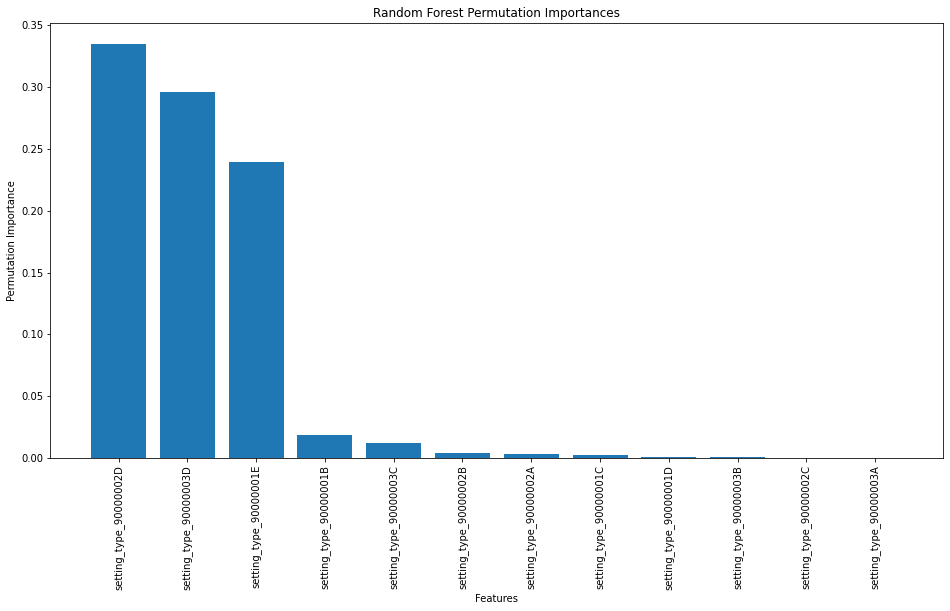

In [61]:
# Fit the RandomForestRegressor model on the important features
rfreg_model.fit(X_selected_train_dummies, y_train)

# Calculate permutation importance
perm_importance = permutation_importance(rfreg_model, X_selected_train_dummies, y_train, n_repeats=30, random_state=777)

# Display the results
sorted_idx = perm_importance.importances_mean.argsort()[::-1]
features = X_selected_train_dummies.columns

fig, ax = plt.subplots(figsize=(16, 8))  # Adjust the width (16) and height (8) based on your preference
plt.bar(range(X_selected_train_dummies.shape[1]), perm_importance.importances_mean[sorted_idx], align="center")
plt.xticks(range(X_selected_train_dummies.shape[1]), features[sorted_idx], rotation='vertical')
ax.set_xlabel('Features')  # Label for the x-axis
ax.set_ylabel('Permutation Importance')  # Label for the y-axis
plt.title("Random Forest Permutation Importances")
plt.show()

The features with the greatest permutation importance in determining the score are the non-WCAG setting types, which lead to poor scores across all three disability types. 

## Evaluate updated models after thorough feature selection

### MODEL 1-B: Apply a Dummy Classifier to the updated dataset

I begin evaluating the updated dataset starting with a simple dummy classifer so I can compare its accuracy to more complex regression models that take input features in consideration.

In [62]:
# Create a baseline model
dummy_updated_model = DummyRegressor(strategy = 'mean')

# Train the model on the preprocessed training data
dummy_updated_model.fit(X_selected_train_dummies, y_train)

# Predict on the testing data
y_pred_dummy_updated = dummy_updated_model.predict(X_selected_test_dummies)

# Evaluate the model's performance using regression metrics
mse_dummy_updated = mean_squared_error(y_test, y_pred_dummy_updated)
mae_dummy_updated = mean_absolute_error(y_test, y_pred_dummy_updated)

print(f'Mean Squared Error: {mse_dummy_updated}')
print(f'Mean Absolute Error: {mae_dummy_updated}')

Mean Squared Error: 468.9881517006803
Mean Absolute Error: 16.390415619047616


### MODEL 2-B: Apply a Decision Tree Model to the updated dataset

Next, I used a Decision Tree Regressor to predict the value of the test score variable based on the updated input variables. To reduce overfitting, I initially set the maximum depth of the decision tree classifier to 3.

In [63]:
# Create an instance of the DecisionTreeRegressor
dt_updated_model = DecisionTreeRegressor(max_depth = 3, random_state = 777)

# Train the model on the preprocessed training data
dt_updated_model.fit(X_selected_train_dummies, y_train)

# Predict on the testing data
y_pred_dt_updated = dt_updated_model.predict(X_selected_test_dummies)

# Evaluate the model's performance using regression metrics
mse_dt_updated = mean_squared_error(y_test, y_pred_dt_updated)
mae_dt_updated = mean_absolute_error(y_test, y_pred_dt_updated)

print(f'Mean Squared Error: {mse_dt_updated}')
print(f'Mean Absolute Error: {mae_dt_updated}')

Mean Squared Error: 290.2535915660983
Mean Absolute Error: 12.917444920677674


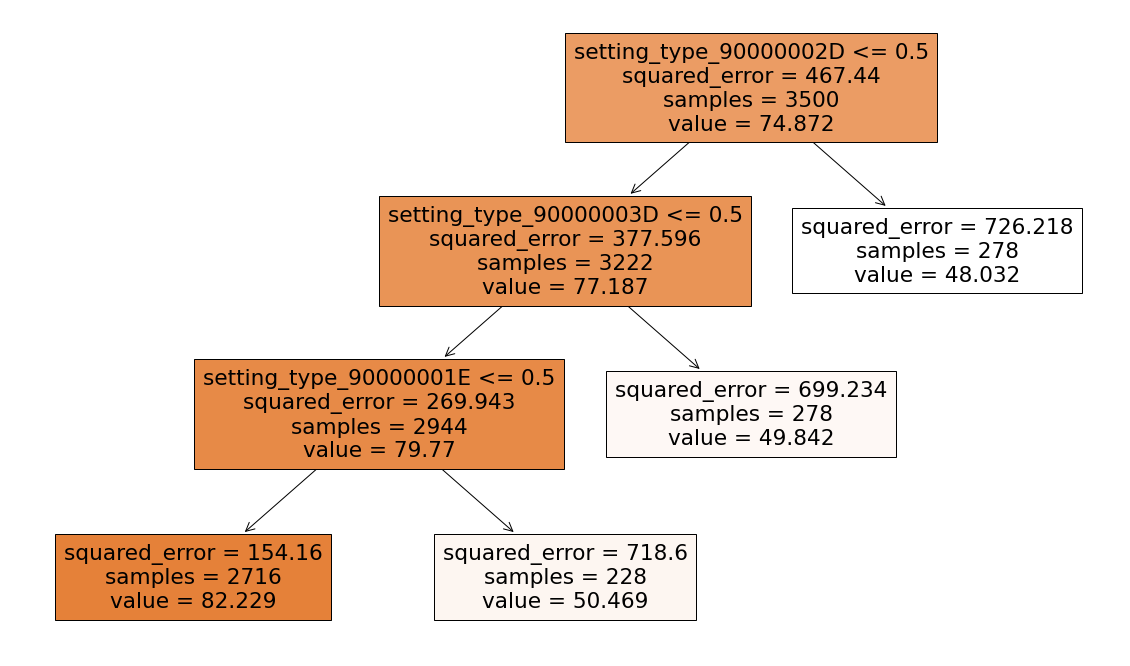

In [64]:
# Plot the decision tree
plt.figure(figsize=(20, 12))
tree.plot_tree(dt_updated_model, feature_names = X_selected_train_dummies.columns, filled = True)
plt.show()

In [65]:
# Initialize an empty dictionary to store feature importances for dt_updated_model
feature_imp = {}

# Iterate over feature importances and feature names for dt_updated_model
for fi, feature in zip(dt_updated_model.feature_importances_, dt_updated_model.feature_names_in_):
    # Assign the feature importance to the corresponding feature name in the dictionary
    feature_imp[feature] = fi

# The feature_imp dictionary now contains feature names as keys and their importances as values for dt_updated_model
feature_imp

{'setting_type_90000001B': 0.0,
 'setting_type_90000001C': 0.0,
 'setting_type_90000001D': 0.0,
 'setting_type_90000001E': 0.32283167809326213,
 'setting_type_90000002A': 0.0,
 'setting_type_90000002B': 0.0,
 'setting_type_90000002C': 0.0,
 'setting_type_90000002D': 0.33099165770280853,
 'setting_type_90000003A': 0.0,
 'setting_type_90000003B': 0.0,
 'setting_type_90000003C': 0.0,
 'setting_type_90000003D': 0.3461766642039294}

In [66]:
# Create a second instance of the DecisionTreeClassifier with less pruning
dt_updated_model2 = DecisionTreeRegressor(max_depth = 4, random_state = 777)

# Train the model on the preprocessed training data
dt_updated_model2.fit(X_selected_train_dummies, y_train)

# Predict on the testing data
y_pred_dt_updated2 = dt_updated_model2.predict(X_selected_test_dummies)

# Evaluate the model's performance using regression metrics
mse_dt_updated2 = mean_squared_error(y_test, y_pred_dt_updated2)
mae_dt_updated2 = mean_absolute_error(y_test, y_pred_dt_updated2)

print(f'Mean Squared Error: {mse_dt_updated2}')
print(f'Mean Absolute Error: {mae_dt_updated2}')

Mean Squared Error: 285.9773048544977
Mean Absolute Error: 12.811352804953884


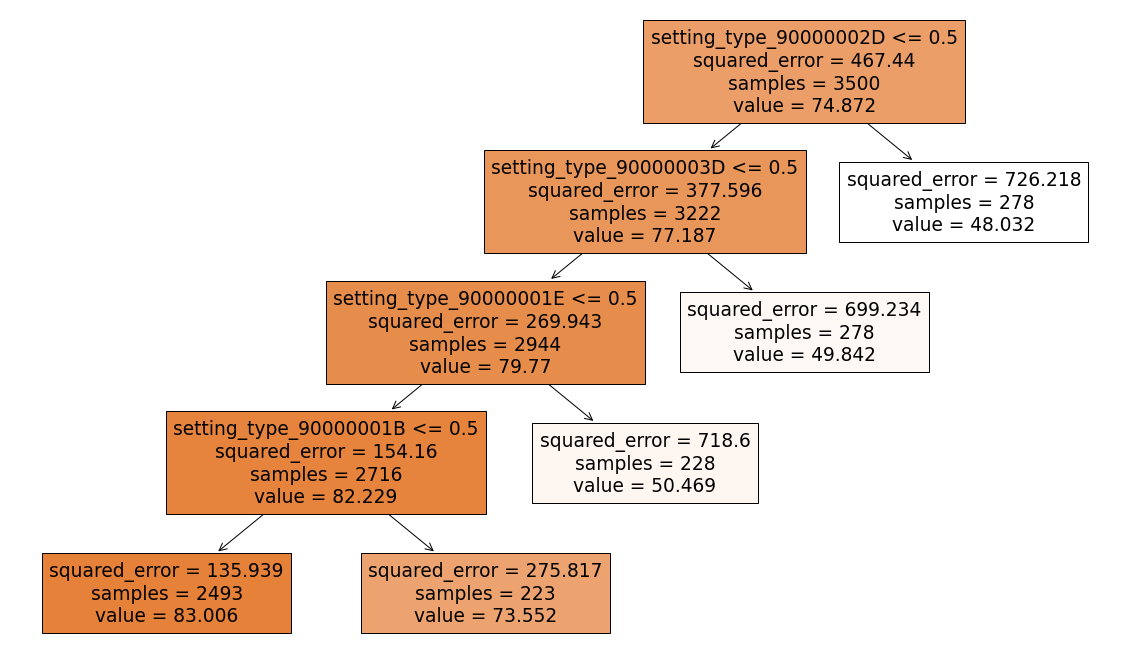

In [67]:
# Plot the decision tree
plt.figure(figsize=(20, 12))
tree.plot_tree(dt_updated_model2, feature_names = X_selected_train_dummies.columns, filled = True)
plt.show()

In [68]:
# Initialize an empty dictionary to store feature importances for dt_updated_model2
feature_imp2 = {}

# Iterate over feature importances and feature names for dt_updated_model2
for fi, feature in zip(dt_updated_model2.feature_importances_, dt_updated_model2.feature_names_in_):
    # Assign the feature importance to the corresponding feature name in the dictionary
    feature_imp2[feature] = fi

# The feature_imp2 dictionary now contains feature names as keys and their importances as values for dt_updated_model2
feature_imp2

{'setting_type_90000001B': 0.027082873448425922,
 'setting_type_90000001C': 0.0,
 'setting_type_90000001D': 0.0,
 'setting_type_90000001E': 0.3140884686103193,
 'setting_type_90000002A': 0.0,
 'setting_type_90000002B': 0.0,
 'setting_type_90000002C': 0.0,
 'setting_type_90000002D': 0.3220274525247586,
 'setting_type_90000003A': 0.0,
 'setting_type_90000003B': 0.0,
 'setting_type_90000003C': 0.0,
 'setting_type_90000003D': 0.3368012054164961}

### MODEL 3-B: Apply a Linear Regression Model to the updated dataset

In [69]:
# Create an instance of the linear regression model
linreg_updated_model = LinearRegression()

# Train the model on the preprocessed training data
linreg_updated_model.fit(X_selected_train_dummies, y_train)

# Predict on the testing data
y_pred_linreg_base_updated = linreg_updated_model.predict(X_selected_test_dummies)

# Calculate the coefficient of determination of the prediction on the train data
r2_train_linreg_base_updated = linreg_updated_model.score(X_selected_train_dummies, y_train)

# Evaluate the model's performance using regression metrics
mse_linreg_base_updated = mean_squared_error(y_test, y_pred_linreg_base_updated)
mae_linreg_base_updated = mean_absolute_error(y_test, y_pred_linreg_base_updated)
r2_test_linreg_base_updated = r2_score(y_test, y_pred_linreg_base_updated)

print(f'Coefficients: {linreg_updated_model.coef_}\n')
print(f'Y-Intercept: {linreg_updated_model.intercept_}\n')

print(f'Coefficient of Determination (R-Square), Train Data: {r2_train_linreg_base_updated}')
print(f'Coefficient of Determination (R-Square), Test Data: {r2_test_linreg_base_updated}\n')
print(f'Mean Squared Error: {mse_linreg_base_updated}')
print(f'Mean Absolute Error: {mae_linreg_base_updated}')

Coefficients: [ -8.10403215   3.9636452    2.68473447 -31.18630341   4.07949768
   4.53060524   0.24071941 -33.62322756   0.55418855   1.69140149
  -5.4563134  -31.81387504]

Y-Intercept: 81.65560165975104

Coefficient of Determination (R-Square), Train Data: 0.4259083816637409
Coefficient of Determination (R-Square), Test Data: 0.40641831021161323

Mean Squared Error: 278.37983928310865
Mean Absolute Error: 12.584562125092829


### MODEL 4-B: Apply a Lasso Regression Model to the updated dataset

In [70]:
# Create an instance of the Lasso regression model
lassoreg_updated_model = Lasso(random_state = 777)

# Train the model on the preprocessed training data
lassoreg_updated_model.fit(X_selected_train_dummies, y_train)

# Predict on the testing data
y_pred_lassoreg_updated = lassoreg_updated_model.predict(X_selected_test_dummies)

# Calculate the coefficient of determination of the prediction on the train data
r2_train_lassoreg_updated = lassoreg_updated_model.score(X_selected_train_dummies, y_train)

# Evaluate the model's performance using regression metrics
mse_lassoreg_updated = mean_squared_error(y_test, y_pred_lassoreg_updated)
mae_lassoreg_updated = mean_absolute_error(y_test, y_pred_lassoreg_updated)
r2_test_lassoreg_updated = r2_score(y_test, y_pred_lassoreg_updated)

print(f'Coefficients: {lassoreg_updated_model.coef_}\n')
print(f'Y-Intercept: {lassoreg_updated_model.intercept_}\n')

print(f'Coefficient of Determination (R-Square), Train Data: {r2_train_lassoreg_updated}')
print(f'Coefficient of Determination (R-Square), Test Data: {r2_test_lassoreg_updated}\n')
print(f'Mean Squared Error: {mse_lassoreg_updated}')
print(f'Mean Absolute Error: {mae_lassoreg_updated}')

Coefficients: [ -0.           0.           0.         -12.54322059   0.
   0.           0.         -17.74109798   0.           0.
  -0.         -15.93174679]

Y-Intercept: 78.36340146886184

Coefficient of Determination (R-Square), Train Data: 0.2901973906002767
Coefficient of Determination (R-Square), Test Data: 0.2872632360332963

Mean Squared Error: 334.2615670556618
Mean Absolute Error: 13.986256871626553


### MODEL 5-B: Apply a Ridge Regression Model to the updated dataset

In [71]:
# Create an instance of the Ridge regression model
ridgereg_updated_model = Ridge(random_state = 777)

# Train the model on the preprocessed training data
ridgereg_updated_model.fit(X_selected_train_dummies, y_train)

# Predict on the testing data
y_pred_ridgereg_updated = ridgereg_updated_model.predict(X_selected_test_dummies)

# Calculate the coefficient of determination of the prediction on the train data
r2_train_ridgereg_updated = ridgereg_updated_model.score(X_selected_train_dummies, y_train)

# Evaluate the model's performance using regression metrics
mse_ridgereg_updated = mean_squared_error(y_test, y_pred_ridgereg_updated)
mae_ridgereg_updated = mean_absolute_error(y_test, y_pred_ridgereg_updated)
r2_test_ridgereg_updated = r2_score(y_test, y_pred_ridgereg_updated)

print(f'Coefficients: {ridgereg_updated_model.coef_}\n')
print(f'Y-Intercept: {ridgereg_updated_model.intercept_}\n')

print(f'Coefficient of Determination (R-Square), Train Data: {r2_train_ridgereg_updated}')
print(f'Coefficient of Determination (R-Square), Test Data: {r2_test_ridgereg_updated}\n')
print(f'Mean Squared Error: {mse_ridgereg_updated}')
print(f'Mean Absolute Error: {mae_ridgereg_updated}')

Coefficients: [ -7.70547146   4.30962032   3.03598524 -30.68770123   4.42883965
   4.87779227   0.60271066 -33.14001188   0.91499627   2.04894495
  -5.07424857 -31.33714449]

Y-Intercept: 81.29159465445846

Coefficient of Determination (R-Square), Train Data: 0.42588137443373175
Coefficient of Determination (R-Square), Test Data: 0.40672672774743857

Mean Squared Error: 278.23519664076946
Mean Absolute Error: 12.58453509896952


In [72]:
ridgereg_updated_model.feature_names_in_

array(['setting_type_90000001B', 'setting_type_90000001C',
       'setting_type_90000001D', 'setting_type_90000001E',
       'setting_type_90000002A', 'setting_type_90000002B',
       'setting_type_90000002C', 'setting_type_90000002D',
       'setting_type_90000003A', 'setting_type_90000003B',
       'setting_type_90000003C', 'setting_type_90000003D'], dtype=object)

### MODEL 6-B: Apply an ElasticNet Regression Model to the updated dataset

In [73]:
# Create an instance of the ElasticNet regression model
elasticnetreg_updated_model = ElasticNet(random_state = 777)

# Train the model on the preprocessed training data
elasticnetreg_updated_model.fit(X_selected_train_dummies, y_train)

# Predict on the testing data
y_pred_elasticnetreg_updated = elasticnetreg_updated_model.predict(X_selected_test_dummies)

# Calculate the coefficient of determination of the prediction on the train data
r2_train_elasticnetreg_updated = elasticnetreg_updated_model.score(X_selected_train_dummies, y_train)

# Evaluate the model's performance using regression metrics
mse_elasticnetreg_updated = mean_squared_error(y_test, y_pred_elasticnetreg_updated)
mae_elasticnetreg_updated = mean_absolute_error(y_test, y_pred_elasticnetreg_updated)
r2_test_elasticnetreg_updated = r2_score(y_test, y_pred_elasticnetreg_updated)

print(f'Coefficients: {elasticnetreg_updated_model.coef_}\n')
print(f'Y-Intercept: {elasticnetreg_updated_model.intercept_}\n')

print(f'Coefficient of Determination (R-Square), Train Data: {r2_train_elasticnetreg_updated}')
print(f'Coefficient of Determination (R-Square), Test Data: {r2_test_elasticnetreg_updated}\n')
print(f'Mean Squared Error: {mse_elasticnetreg_updated}')
print(f'Mean Absolute Error: {mae_elasticnetreg_updated}')

Coefficients: [-0.          0.36960456  0.21145019 -1.9683653   0.69454442  0.70091089
  0.11999359 -2.86414631  0.12217171  0.39955719  0.         -2.61611895]

Y-Intercept: 75.22118428629894

Coefficient of Determination (R-Square), Train Data: 0.06796545617247574
Coefficient of Determination (R-Square), Test Data: 0.06775120475924712

Mean Squared Error: 437.20902153082193
Mean Absolute Error: 15.844916480591571


## Interpretation of Updated Model Results and Next Steps

Of all the different updated models (dummy, decision tree, linear regression, lasso, ridge and elasticNet), ridge regression has the best performance with the lowest errors and highest explanatory R-square value. The Mean Squared Error (MSE) of 278.2 and Mean Absolute Error (MAE) of 12.6 is the lowest of all the models. The Coefficients of Determination (R-Squareds) show that approximately 42.6% of the variance in the training data test scores is explained by the updated ridge regression model, and approximately 40.7% of the variance in the test data test scores is explained by the updated ridge regression model.

These results after feature selection based on importance are improvements compared to the base models run before feature selection. The MSE and MAE are both lower now. For the base models, they were 279.2 and 12.6 respectively, slightly higher than the errors after feature selection. Also, the updated ridge model is now explaining more of the variance in the test data test scores since the R-square for the test set was 40.5%. 

We have a slight improvement after feature selection and ridge regressions continues to perform the best of all the model ran. However, before selecting a final model and interpreting the results, I can refine the models by cross validating and tuning hyperparameters.

### Perform Cross-Validation on the Selected Model (Ridge Regression after Feature Selection)

Since ridge regression is performing the best of all models both before and after feature selection, the next step is to implement k-fold cross-validation to assess the model's performance on different subsets of the data.

In [74]:
# Implement k-fold cross-validation on the training data using Ridge regression

# Choose the number of folds as 5-fold cross-validation
num_folds = 5

# Create a KFold object
kf = KFold(n_splits=num_folds, shuffle=True, random_state=777)

# Perform cross-validation for R-squared
cross_val_r2 = cross_val_score(ridgereg_updated_model, X_selected_train_dummies, y_train, cv=kf, scoring='r2')

# Perform cross-validation for MSE
cross_val_mse = cross_val_score(ridgereg_updated_model, X_selected_train_dummies, y_train, cv=kf, scoring='neg_mean_squared_error')

# Convert the negative mean squared error to positive since sklearn reports negative MSE
positive_mse_cv = -cross_val_mse

# Evaluate the model's performance metrics across different folds

# Print the results
print(f'Mean Cross-Validated R-Squared: {cross_val_r2.mean()}')
print(f'Mean Cross-Validated MSE: {positive_mse_cv.mean()}')

Mean Cross-Validated R-Squared: 0.42108805858080034
Mean Cross-Validated MSE: 270.2633274301318


The cross-validation results provide insights into the generalized performance of the Ridge regression model. 

* **Mean Cross-Validated R-Squared**: The R-squared measures the proportion of the variance in the dependent variable (test scores) that is predictable from the independent variables (accessibility setting and font color categorical features).
A value of 0.4211 indicates that the model explains about 42.11% of the variance in the test scores, on average, across different folds. This is an improvement compared to the R-squared on the test data of the updated ridge regression model (0.4067), suggesting that the model generalizes well to unseen data.

* **Mean Cross-Validated MSE**: The Mean Squared Error represents the average squared difference between the actual and predicted values. A lower MSE indicates better model performance. In this case, the mean cross-validated MSE of 270.26 is an improvement compared to the MSE on the test data (278.24). The model's predictions, on average, are closer to the actual test scores across different folds.

* **Interpretation**: The cross-validated results suggest that the Ridge regression model, after feature selection, performs well on different subsets of the training data. The improvements in both R-squared and MSE indicate that the model is better at generalizing to new data compared to its performance on the test set. It's a positive sign that the model is not overfitting to the specific characteristics of the test set.

Next, I can tune hyperparameters such as the regularization strength for the ridge regression model to see if I can any further improvement.

### Fine-tune Hyperparameters of the Selected Model (Ridge Regression after Feature Selection) using GridSearchCV

Fine-tuning hyperparameters of the Ridge Regression model using GridSearchCV will help identify the best combination of hyperparameter values for the model.

In [75]:
# Define the hyperparameters and their possible values
param_grid = {'alpha': [0.1, 1, 10, 100, 1000]}

# Create a GridSearchCV object
grid_search = GridSearchCV(ridgereg_updated_model, param_grid, cv=num_folds, scoring='r2')

# Fit the GridSearchCV object on the training data
grid_search.fit(X_selected_train_dummies, y_train)

# Get the best hyperparameters
best_alpha = grid_search.best_params_['alpha']

# Print the best hyperparameters
print(f'Best Hyperparameters: {grid_search.best_params_}')

Best Hyperparameters: {'alpha': 1}


The default regularization strength of 1 performs best in cross-validation so there is no need to modify our model since it uses the default parameter of 1.

## Explore Ensemble Methods

### Model 7-B: Apply a Random Forest Regression Model to the updated dataset

In [76]:
# Evaluate the performance of the RandomForestRegressor model (used during feature importance) on the test data
y_pred_rfreg = rfreg_model.predict(X_selected_test_dummies)

# Calculate the coefficient of determination on the test data
r2_test_rfreg = rfreg_model.score(X_selected_test_dummies, y_test)

# Predict on the training data
y_pred_train_rfreg = rfreg_model.predict(X_selected_train_dummies)

# Calculate the coefficient of determination on the training data
r2_train_rfreg = r2_score(y_train, y_pred_train_rfreg)

# Calculate the Mean Squared Error on the training data
mse_train_rfreg = mean_squared_error(y_train, y_pred_train_rfreg)

# Calculate the Mean Absolute Error on the training data
mae_train_rfreg = mean_absolute_error(y_train, y_pred_train_rfreg)

# Print the results
print(f'Random Forest - Coefficient of Determination (R-Square), Test Data: {r2_test_rfreg}')
print(f'Random Forest - Coefficient of Determination (R-Square), Train Data: {r2_train_rfreg}')
print(f'Random Forest - Mean Squared Error, Train Data: {mse_train_rfreg}')
print(f'Random Forest - Mean Absolute Error, Train Data: {mae_train_rfreg}')


Random Forest - Coefficient of Determination (R-Square), Test Data: 0.4064365671671548
Random Forest - Coefficient of Determination (R-Square), Train Data: 0.42589772887335486
Random Forest - Mean Squared Error, Train Data: 268.35826715104133
Random Forest - Mean Absolute Error, Train Data: 12.436857241226798


While the MSE, MAE and R-squared results on the train data are better than the results of the ridge regression model after feature selection, the R-squared value on the test dataset is lower than that of the ridge regression model. This means that the random forest model explains less of variance in the test data. Additionally, the ridge regression model is more beneficial due to its interpretability with coefficients and lower computational complexity.

Interpretability: Ridge regression is a linear model and provides coefficients for each feature, making it more easily interpretable. Random Forest, being an ensemble method, may be less interpretable.

Computational Complexity: Ridge regression is generally computationally less expensive than Random Forest. If computational efficiency is crucial, this could be a factor to consider.

### Model 8-B: Apply a Gradient Boosting Regression Model with Grid Search to the updated dataset

In [77]:
# Create an instance of the GradientBoostingRegressor model
gbreg_model = GradientBoostingRegressor(random_state=777)

# Define hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1.0]
}

# Perform GridSearchCV
grid_search = GridSearchCV(gbreg_model, param_grid, cv=num_folds, scoring='r2', n_jobs=-1)
grid_search.fit(X_selected_train_dummies, y_train)

# Get the best model
best_gbreg_model = grid_search.best_estimator_

# Predict on the testing data using the best model
y_pred_gbreg = best_gbreg_model.predict(X_selected_test_dummies)

# Calculate the coefficient of determination on the test data
r2_test_gbreg = best_gbreg_model.score(X_selected_test_dummies, y_test)

# Calculate the coefficient of determination on the train data
r2_train_gbreg = best_gbreg_model.score(X_selected_train_dummies, y_train)

# Evaluate the model's performance using regression metrics
mse_gbreg = mean_squared_error(y_test, y_pred_gbreg)
mae_gbreg = mean_absolute_error(y_test, y_pred_gbreg)

# Print the results
print(f'Gradient Boosting - Coefficient of Determination (R-Square), Train Data: {r2_train_gbreg}')
print(f'Gradient Boosting - Coefficient of Determination (R-Square), Test Data: {r2_test_gbreg}')
print(f'Mean Squared Error: {mse_gbreg}')
print(f'Mean Absolute Error: {mae_gbreg}')

Gradient Boosting - Coefficient of Determination (R-Square), Train Data: 0.4257298358186856
Gradient Boosting - Coefficient of Determination (R-Square), Test Data: 0.40534541863889073
Mean Squared Error: 278.8830074042297
Mean Absolute Error: 12.593066293138817


Once again, the R-squared value is decent but this Gradient Boosting Regression model also does not perform better than the ridge regression model. The ridge regression model is a better choice than both ensemble methods (random forest and gradient boosting) because it is more interpretable with coefficients and has a lower computational complexity. Thus, a ridge regression model will be our final model.

## Final Model Selection

In the process of reviewing different models to select a final one, I considered the following:

1. Model Performance:
I compared the R-Squared values, Mean Squared Error (MSE), and Mean Absolute Error (MAE) for various models and considered the trade-offs between training and test data performance. Below is a summary table of all the results.

    Before feature selection, the ridge regression model had the best results, with the decision tree and lasso regression models having the next best results.

|    Model      |   MSE       |    MAE     | R-Square (Train) | R-Square (Test) |  
| ------------- | ----------- |----------- | ---------------- |---------------- |
| Dummy         |  468.9881517    |    16.39041562   |                  |                 |
| Decision Tree |  281.7440335     |    12.67137576   |                  |                 |
| Linear Regression	| 4.9954E+25 | 6.0888E+12	| 0.423505328	| -1.07E+23 |
| Lasso	| 368.7990056	| 14.88567803	| 0.228786098	| 0.213620004 |
| Ridge	| 279.2712164	| 12.62440389	| 0.4287115	| 0.404517651 |
| ElasticNet | 369.8972138	| 14.78720768	| 0.221000529	| 0.211278325 |

  After feature selection	(narrowing down to accessibility settings and font color categorical variables only), the ridge regression model still had the best results of the models that are easiest to interpret with coefficients, with the linear regression and decision tree models having the next best results of the more interpretable models.
    
|    Model      |   MSE       |    MAE     | R-Square (Train) | R-Square (Test) |  
| ------------- | ----------- |----------- | ---------------- |---------------- |
| Dummy         |  468.9881517    |    16.39041562   |                  |                 |
| Decision Tree |  290.2535916     |    12.91744492   |                  |                 |
| Linear Regression	| 278.3798393	| 12.58456213 |	0.425908382	| 0.40641831 |
| Lasso | 334.2615671 |	13.98625687	| 0.290197391	| 0.287263236 |
| Ridge | 278.2351966	| 12.5845351	| 0.425881374	| 0.406726728 |
| ElasticNet | 437.2090215 | 15.84491648	| 0.067965456	| 0.067751205 |
| Random Forest | 268.3582672	| 12.43685724	| 0.406436567	| 0.425897729 |
| Gradient Boosting | 278.8830074	| 12.59306629	| 0.425729836	| 0.405345419 |

2. Interpretability:
Models, like ridge regression (and also linear, lasso and elasticNet regression) offer simpler interpretations with coefficients compared to models like dummy regression, decision trees, random forest and gradient boosting. I am able to infer the effects of different assessibility settings and font colors from the coefficients of the ridge regression model after feature selection.

3. Computational Efficiency: The computational efficiency of the selected model matters, especially if it will be deployed as part of a recommendation system in a production environment. Ridge regression has a much a much lower time complexity and consume less computation resources than ensemble models like random forest and gradient boosting.

4. Fine-Tuning:
I fine-tuned the regularization strength hyperparameter for the ridge regression model to further enhance performance, but still found the default regularization strength of 1 to be superior.

6. Validation:
I cross-validated the ridge regression on different folds of the training data to ensure the model would generalize well to new, unseen data. It performed well across the different folds.

The ridge regression model has the highest R-Squared on the test data. Of the models that are most interpretable with coefficients, it also has the lowest error metrics. My final model will therefore be the ridge regression model.



9. Documentation:
Once you've made your final decision, you can proceed with 

## Final Model Interpretation

Given the y-intercept and the coefficients of the ridge regression model after feature selection, the equation to calculate the predicted test score is as follows:

$
\text{Predicted Test Score} = 81.29 - (7.71 \times \text{setting\_type\_90000001B}) + (4.31 \times \text{setting\_type\_90000001C}) + (3.04 \times \text{setting\_type\_90000001D}) - (30.69 \times \text{setting\_type\_90000001E})  + (4.43 \times \text{setting\_type\_90000002A}) + (4.88 \times \text{setting\_type\_90000002B}) + (0.60 \times \text{setting\_type\_90000002C}) - (33.14 \times \text{setting\_type\_90000002D})  + (0.91 \times \text{setting\_type\_90000003A}) + (2.05 \times \text{setting\_type\_90000003B}) - (5.07 \times \text{setting\_type\_90000003C}) - (31.34 \times \text{setting\_type\_90000003D})  
$

Below, I interpretate the y-intercept and the coefficients of the ridge regression model after one-hot encoding 'setting_type'. The coefficients represent the change in the predicted test score for a one-unit change in the corresponding feature while holding other features constant.

#### The Y-intercept

The 81.29 y-intercept can be interpreted as the predicted test score when all the predictor variables ('setting_type') are set to their reference categories. At the y-intercept, the assessibility setting becomes the '90000001A' reference category that was dropped during one-hot encoding. All the coefficients associated with different categories are then multiplied by zero and the equation simplifies to the y-intercept, as follows:

$\text{Predicted Test Score} = 81.29 $

The y-intercept of 81.29 is the estimated test score when all categorical variables are at their baseline or reference levels.


#### Coefficients for 'setting_type' relative to '90000001A' (the first setting_type category dropped during one-hot encoding):

- **'setting_type_90000001B'**: An increase in the '90000001B' setting type is associated with a decrease of approximately 7.71 points in the predicted test score compared to '90000001A'.

- **'setting_type_90000001C'**: An increase in the '90000001C' setting type is associated with an increase of approximately 4.31 points in the predicted test score compared to '90000001A'.

- **'setting_type_90000001D'**: An increase in the '90000001D' setting type is associated with an increase of approximately 3.04 points in the predicted test score compared to '90000001A'.

- **'setting_type_90000001E'**: An increase in the '90000001E' setting type is associated with a decrease of approximately 30.69 points in the predicted test score compared to '90000001A'.

- **'setting_type_90000002A'**: An increase in the '90000002A' setting type is associated with an increase of approximately 4.43 points in the predicted test score compared to '90000001A'.

- **'setting_type_90000002B'**: An increase in the '90000002B' setting type is associated with an increase of approximately 4.88 points in the predicted test score compared to '90000001A'.

- **'setting_type_90000002C'**: An increase in the '90000002C' setting type is associated with an increase of approximately 0.60 points in the predicted test score compared to '90000001A'.

- **'setting_type_90000002D'**: An increase in the '90000002D' setting type is associated with a decrease of approximately 33.14 points in the predicted test score compared to '90000001A'.

- **'setting_type_90000003A'**: An increase in the '90000003A' setting type is associated with an increase of approximately 0.91 points in the predicted test score compared to '90000001A'.

- **'setting_type_90000003B'**: An increase in the '90000003B' setting type is associated with an increase of approximately 2.05 points in the predicted test score compared to '90000001A'.

- **'setting_type_90000003C'**: An increase in the '90000003C' setting type is associated with a decrease of approximately 5.07 points in the predicted test score compared to '90000001A'.

- **'setting_type_90000003D'**: An increase in the '90000003D' setting type is associated with a decrease of approximately 31.34 points in the predicted test score compared to '90000001A'.

These interpretations provide insights into how each category within 'setting_type' contributes to the predicted test score, taking the reference category '90000001A' into account.

## The Recommendation System

### Use the coefficients from the final ridge regression model to build the recommendation system by mapping features to coefficients. 

In [78]:
def map_features_to_coefficients(feature_names, coefficients, one_hot_encoder):
    """
    Map feature names and their corresponding coefficients to create a dictionary.

    Parameters:
    - feature_names (array): Array of feature names.
    - coefficients (array): Array of coefficients corresponding to the features.
    - one_hot_encoder (OneHotEncoder): OneHotEncoder used for encoding.

    Returns:
    - dict: A dictionary mapping setting types to their coefficients.
    """
    # Initialize an empty dictionary to store coefficients
    coefficients_dict = {}

    # Extract categories and dropped index from one-hot encoder to get reference category
    categories = one_hot_encoder.categories_[0]
    drop_idx = int(one_hot_encoder.drop_idx_[0])  # Extract the integer value
    reference_category = categories[drop_idx]

    # Add missing setting_type for ohe-dropped reference category with coefficient 0
    coefficients_dict[reference_category] = 0

    # Iterate through feature names and coefficients
    for feature, coef in zip(feature_names, coefficients):
        # Extract the setting type from the feature name
        setting_type = feature.split('_')[2]

        # Add back the reference category with a coefficient of 0
        if feature.startswith('setting_type') and feature.endswith(categories[drop_idx]):
            coefficients_dict[setting_type] = 0
        else:
            coefficients_dict[setting_type] = coef

    # Return the final coefficients dictionary
    return coefficients_dict

# Example usage:
# Use the feature names and coefficients from the Ridge regression model
feature_names = ridgereg_updated_model.feature_names_in_
coefficients = ridgereg_updated_model.coef_

# Call the function to map features to coefficients and print the result
coefficients_dict = map_features_to_coefficients(feature_names, coefficients, ohe)
# Uncomment the line below to print the generated coefficients dictionary
# print(coefficients_dict)

### Create a Recommendation System function that takes in a disability ID and recommends the appropriate assessibility setting that maximizes the test score for that disability ID.

In [79]:
def recommend_setting(disability_id, disability_settings = disability_settings, coefficients_dict = coefficients_dict):
    """
    Recommend the setting type for a given disability_id based on the highest coefficient.

    Parameters:
    - disability_id (int): The disability_id for which to recommend the setting.
    - disability_settings (list): List of dictionaries containing disability settings.
    - coefficients_dict (dict): Dictionary mapping setting types to their coefficients.

    Returns:
    - dict: The dictionary associated with the recommended_setting.
    """
    # Convert disability_id to integer for comparison
    disability_id = int(disability_id)

    # Find the entry in disability_settings with the given disability_id
    disability_entry = next((entry for entry in disability_settings if entry['disability_id'] == disability_id), None)

    if not disability_entry:
        return None  # Handle cases where disability_id is not in the disability_settings

    # Get the relevant setting types for the given disability_id
    relevant_setting_types = disability_entry.get('accessibility_types', [])

    if not relevant_setting_types:
        return None  # Handle cases where disability_id is not in the disability_settings

    # Get the setting type with the highest coefficient among the relevant setting types
    recommended_setting_type = max(relevant_setting_types, key=lambda setting_type: coefficients_dict.get(setting_type['setting_type'], 0))

    return recommended_setting_type

# Call the function to test:
disability_id = '90000003'
recommended_setting = recommend_setting(disability_id)

print(f"The recommended setting type for disability_id {disability_id} is as follows:\n{recommended_setting}")


The recommended setting type for disability_id 90000003 is as follows:
{'setting_type': '90000003B', 'font_color': 'black russian', 'background_color': 'prim', 'font_size': 18, 'font_weight': 'regular', 'font_family': 'Source Sans Pro', 'letter_spacing': 2.16, 'line_spacing': 27, 'word_spacing': 2.88, 'text_alignment': 'left aligned', 'is_auto_play_tts': False, 'bionic_reading': False, 'lists_with_bullets': False, 'wcag_compliant': True, 'score_avg': 90, 'score_std': 15}


Export the Recommendation System function so it can be utilized by the full-stack application.

In [80]:
# Export necessary functions and variables to recommendation_module.py
with open("recommendation_module.py", "wb") as f:
    dill.dump({
        'recommend_setting': recommend_setting,
        'disability_settings': disability_settings,
        'coefficients_dict': coefficients_dict
    }, f)